In [1]:
import os
import pandas as pd

In [145]:
# df1 = pd.read_csv('data_run5/all_samples_combined_annotated_varscan.tsv', sep = '\t')
# df2 = pd.read_csv('data_run6_2repsamples/all_samples_combined_annotated_varscan.tsv', sep = '\t')
# #concat annotaed varscans from 2 runs 
# vars = pd.concat([df1, df2], ignore_index=True)
vars = pd.read_csv('data/all_samples_combined_annotated_varscan.tsv', sep = '\t')


In [146]:
vars

,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,Unnamed: 9,replicate,sample_ID
0,ha,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,NaN,replicate-2,be_w3
1,ha,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,NaN,replicate-2,be_w3
2,ha,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,NaN,replicate-2,be_w3
3,ha,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,NaN,replicate-2,be_w3
4,ha,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,NaN,replicate-2,be_w3
...,...,...,...,...,...,...,...,...,...,...,...,...
6870,pa,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,NaN,replicate-1,bv_w7
6871,pa,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,NaN,replicate-1,bv_w7
6872,pa,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,NaN,replicate-1,bv_w7
6873,pa,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,NaN,replicate-1,bv_w7


In [147]:
#input gene for NA which got misread as an Nan

vars.loc[vars['sample'] == 'na', 'gene'] = 'NA'


In [148]:
#drop weird genes that are duplicate variant calls
vars = vars[~vars['gene'].isin(['PA-X', 'NEP', 'M2', 'PB1-F2'])]


In [149]:
#make merged column for gene and its position
vars['gene_pos'] = vars['gene'] + "_" + vars['reference_position'].astype(str)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1095525618.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
vars['sample_var'] = vars['sample_ID'] + "_" + vars['gene_pos'].astype(str)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2176220271.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
vars = vars[vars['frequency'] <= 0.5]
vars

,sample,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,Unnamed: 9,replicate,sample_ID,gene_pos,sample_var
0,ha,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,NaN,replicate-2,be_w3,HA_858,be_w3_HA_858
1,ha,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,NaN,replicate-2,be_w3,HA_1073,be_w3_HA_1073
2,ha,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,NaN,replicate-2,be_w3,HA_1118,be_w3_HA_1118
3,ha,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,NaN,replicate-2,be_w3,HA_1151,be_w3_HA_1151
4,ha,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,NaN,replicate-2,be_w3,HA_1261,be_w3_HA_1261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,pa,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,NaN,replicate-1,bv_w7,PA_1305,bv_w7_PA_1305
6871,pa,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,NaN,replicate-1,bv_w7,PA_1566,bv_w7_PA_1566
6872,pa,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,NaN,replicate-1,bv_w7,PA_1978,bv_w7_PA_1978
6873,pa,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,NaN,replicate-1,bv_w7,PA_2007,bv_w7_PA_2007


In [152]:
vars = vars.drop(columns=['sample', 'Unnamed: 9'])
vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261
...,...,...,...,...,...,...,...,...,...,...,...,...
6870,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,replicate-1,bv_w7,PA_1305,bv_w7_PA_1305
6871,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,replicate-1,bv_w7,PA_1566,bv_w7_PA_1566
6872,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,replicate-1,bv_w7,PA_1978,bv_w7_PA_1978
6873,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,replicate-1,bv_w7,PA_2007,bv_w7_PA_2007


In [153]:
# Calculate the frequency of each value in 'gene_var'
gene_var_counts = vars['sample_var'].value_counts()

# # Create the new column 'rep_shared'
vars['rep_shared'] = vars['sample_var'].apply(lambda x: 'shared' if gene_var_counts[x] > 1 else 'single_rep')


In [100]:
vars.head(20)

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep
5,HA,1287,T,C,Leu425Leu,synonymous,2.28%,0.0228,replicate-2,be_w3,HA_1287,be_w3_HA_1287,single_rep
6,HA,1579,A,G,Lys522Arg,nonsynonymous,1.42%,0.0142,replicate-2,be_w3,HA_1579,be_w3_HA_1579,single_rep
7,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,HA_1580,be_w3_HA_1580,shared
8,HA,1641,G,T,Ala543Ser,nonsynonymous,1.91%,0.0191,replicate-2,be_w3,HA_1641,be_w3_HA_1641,single_rep
9,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,NA_285,be_w3_NA_285,shared


In [101]:
gene_var_counts

sample_var
bo_w1_PB2_1306    2
bo_w1_PB2_1410    2
bo_w1_PB2_1449    2
bo_w1_PB2_1443    2
bo_w1_PB2_1440    2
                 ..
bv_w2_PA_1260     1
bv_w2_PA_1270     1
bv_w2_PA_1306     1
bv_w2_PA_1329     1
bv_w7_NP_975      1
Name: count, Length: 2848, dtype: int64

In [154]:
# Hierarchical sorting by 'Category' (ascending) and then 'Value' (descending)
# vars_sorted = vars.sort_values(by=['Category', 'Value'], ascending=[True, False])
vars_sorted = vars.sort_values(by=['sample_ID', 'gene', 'reference_position'], ascending=[False, True, True])
vars_sorted.tail(15)

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared
3070,PB2,924,C,A,Ala307Ala,synonymous,1.89%,0.0189,replicate-2,be_w1,PB2_924,be_w1_PB2_924,single_rep
3071,PB2,933,A,G,Ile310Met,nonsynonymous,1.22%,0.0122,replicate-2,be_w1,PB2_933,be_w1_PB2_933,single_rep
3157,PB2,939,G,A,Lys312Lys,synonymous,1.6%,0.0160,replicate-1,be_w1,PB2_939,be_w1_PB2_939,single_rep
3158,PB2,1050,T,C,Leu349Leu,synonymous,1.81%,0.0181,replicate-1,be_w1,PB2_1050,be_w1_PB2_1050,single_rep
3159,PB2,1174,G,A,Glu391Lys,nonsynonymous,1.71%,0.0171,replicate-1,be_w1,PB2_1174,be_w1_PB2_1174,single_rep
3160,PB2,1295,T,A,Met431Lys,nonsynonymous,2.24%,0.0224,replicate-1,be_w1,PB2_1295,be_w1_PB2_1295,single_rep
3072,PB2,1300,C,T,Gln433Stop,stop_gained,3.12%,0.0312,replicate-2,be_w1,PB2_1300,be_w1_PB2_1300,single_rep
3073,PB2,1536,A,G,Val511Val,synonymous,2.65%,0.0265,replicate-2,be_w1,PB2_1536,be_w1_PB2_1536,single_rep
3074,PB2,1567,C,A,Gln522Lys,nonsynonymous,3.1%,0.0310,replicate-2,be_w1,PB2_1567,be_w1_PB2_1567,single_rep
3161,PB2,1578,G,A,Glu525Glu,synonymous,3.13%,0.0313,replicate-1,be_w1,PB2_1578,be_w1_PB2_1578,single_rep


In [155]:
##need to drop samples that only have one rep- ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

values_to_remove = ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

# Drop rows where 'sample_ID' is in the list
vars = vars[~vars["sample_ID"].isin(values_to_remove)]

# Reset index (optional, if needed)
vars = vars.reset_index(drop=True)

In [156]:


result = vars.groupby('gene')['rep_shared'].value_counts()
result

gene  rep_shared
HA    single_rep    263
      shared         78
M1    single_rep     12
      shared          2
NA    single_rep    238
      shared         80
NP    single_rep    223
      shared        148
NS1   single_rep    125
      shared         98
PA    single_rep    270
      shared        140
PB1   single_rep    467
      shared        308
PB2   shared        508
      single_rep    476
Name: count, dtype: int64

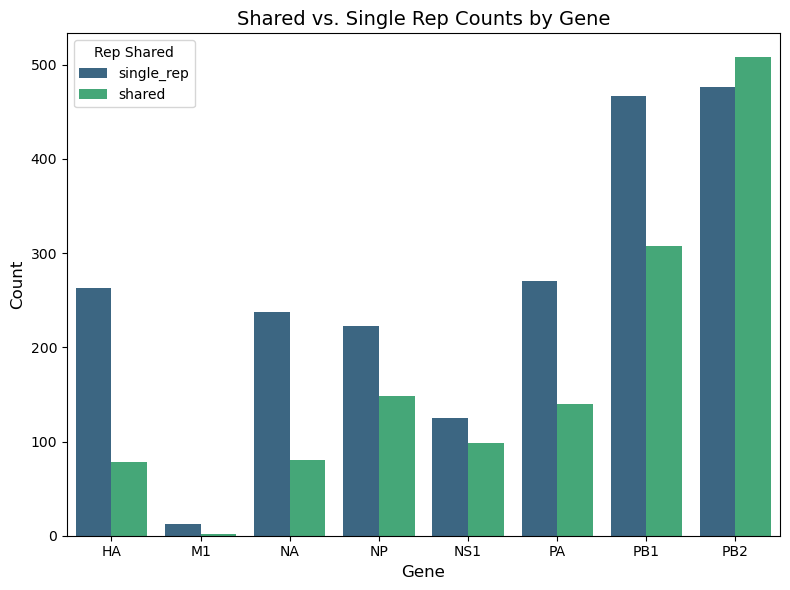

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'gene' and count unique values in 'rep_shared'
result = vars.groupby('gene')['rep_shared'].value_counts().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='gene', y='count', hue='rep_shared', palette='viridis')

# Add labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Shared vs. Single Rep Counts by Gene', fontsize=14)
plt.legend(title='Rep Shared', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


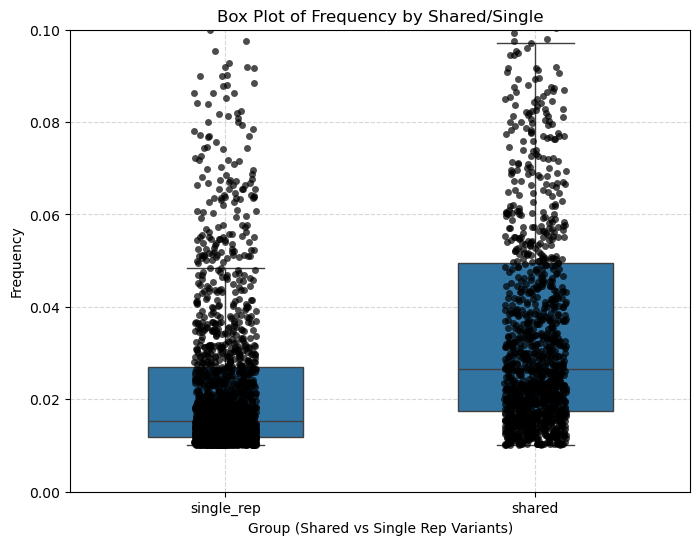

In [158]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='frequency', data=vars, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='frequency', data=vars, jitter=True, color='black', alpha=0.7)  # Individual points

# Customize plot
plt.xlabel("Group (Shared vs Single Rep Variants)")
plt.ylabel("Frequency")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
# plt.yscale('logit')
plt.ylim(0, 0.1)

# Show plot
plt.show()

In [159]:
import scipy.stats as stats

# Calculate means
vars = vars.dropna(subset=["frequency"])

means = vars.groupby("rep_shared")["frequency"].mean()
print("Mean Frequency by Group:")
print(means)

# Perform independent t-test
shared = vars[vars["rep_shared"] == "shared"]["rep_shared"]
single = vars[vars["rep_shared"] == "single"]["rep_shared"]

t_stat, p_value = stats.ttest_ind(shared, single, equal_var=False)  # Welch's t-test (better for unequal variances)

# Display results
print(f"\nT-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")


Mean Frequency by Group:
rep_shared
shared        0.049663
single_rep    0.035710
Name: frequency, dtype: float64

T-test results:
T-statistic = nan, P-value = nan


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/325618667.py:14: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



In [160]:
print(vars["rep_shared"].value_counts())


rep_shared
single_rep    2074
shared        1362
Name: count, dtype: int64


In [161]:
ct_df= pd.read_csv('../Desktop/HPAI_PA/PA_samples_seqd.tsv', sep='\t')
# Remove '_R1' from the 'sample' column
ct_df['sample_ID'] = ct_df['sample_ID'].str.replace('_R1', '', regex=False).str.lower()

ct_df

,sample_species,domestic_status,county,date_collected,ct_value,sample_ID
0,Khaki Campbell,commercial,Chester,2/23/23,17.720,kc_com1
1,chicken broiler,commercial,Chester,2/23/23,18.760,cb_com1
2,Khaki Campbell,commercial,Chester,2/23/23,20.060,kc_com2
3,chicken broiler,commercial,Chester,2/23/23,20.280,cb_com2
4,Gray Fox,wild,unknown,4/2/23,12.910,gf_w
5,Black Vulture,wild,Lancaster,4/6/23,16.830,bv_w1
6,Black Vulture,wild,Lehigh,11/29/22,18.160,bv_w2
7,Turkey Vulture,wild,Lancaster,3/17/23,19.950,tv_w1
8,mute swan,wild,Monroe,10/2/22,25.040,ms_w1
9,bald eagle,wild,Crawford,9/28/22,26.950,be_w


In [162]:

ct_df['sample_ID'] = ct_df['sample_ID'].replace({'be_w': 'be_w1', 'gf_w': 'gf_w1'})
ct_df

,sample_species,domestic_status,county,date_collected,ct_value,sample_ID
0,Khaki Campbell,commercial,Chester,2/23/23,17.720,kc_com1
1,chicken broiler,commercial,Chester,2/23/23,18.760,cb_com1
2,Khaki Campbell,commercial,Chester,2/23/23,20.060,kc_com2
3,chicken broiler,commercial,Chester,2/23/23,20.280,cb_com2
4,Gray Fox,wild,unknown,4/2/23,12.910,gf_w1
5,Black Vulture,wild,Lancaster,4/6/23,16.830,bv_w1
6,Black Vulture,wild,Lehigh,11/29/22,18.160,bv_w2
7,Turkey Vulture,wild,Lancaster,3/17/23,19.950,tv_w1
8,mute swan,wild,Monroe,10/2/22,25.040,ms_w1
9,bald eagle,wild,Crawford,9/28/22,26.950,be_w1


In [163]:
vars = vars.merge(ct_df[['sample_ID', 'domestic_status', 'ct_value']], 
                        on='sample_ID', 
                        how='left')  
vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep,wild,27.07
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep,wild,27.07
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep,wild,27.07
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep,wild,27.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,replicate-1,bv_w7,PA_1305,bv_w7_PA_1305,shared,wild,20.75
3432,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,replicate-1,bv_w7,PA_1566,bv_w7_PA_1566,shared,wild,20.75
3433,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,replicate-1,bv_w7,PA_1978,bv_w7_PA_1978,shared,wild,20.75
3434,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,replicate-1,bv_w7,PA_2007,bv_w7_PA_2007,shared,wild,20.75


In [171]:
##read in full meta for these seqs
meta = pd.read_csv('../Desktop/source/HPAI-NA/2025-01-21_HAonly_NorthAm_PA_with2024/2025_01_21_metadata_hpaiPAonly.tsv', sep='\t')
meta

,strain,date,region,country,division,location,host,subtype,originating_lab,h5_label_clade,...,order,flyway,geo_region_na,ID,Country,Species,Domestic_Status,species_group,County,Run_number
0,A/baldeagle/Pennsylvania/BE_W/2022,2022-09-28,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,BE_W,United States,bald eagle,Wild,Raptor,Crawford,4
1,A/blackvulture/Pennsylvania/BV_W1/2023,2023-04-06,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,BV_W1,United States,black vulture,Wild,Raptor,Lancaster,4
2,A/blackvulture/Pennsylvania/BV_W2/2022,2022-11-29,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,BV_W2,United States,black vulture,Wild,Raptor,Lehigh,4
3,A/broilerchicken/Pennsylvania/CB_com1/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,galliformes,Atlantic Flyway,Northeast,CB_com1,United States,chicken,Domestic,Galliformes,Chester,4
4,A/broilerchicken/Pennsylvania/CB_com2/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,galliformes,Atlantic Flyway,Northeast,CB_com2,United States,chicken,Domestic,Galliformes,Chester,4
5,A/grayfox/Pennsylvania/GF_W/2023,2023-04-02,North America,Usa,Pennsylvania,Pennsylvania,Nonhuman Mammal,h5n1,UPENN,2.3.4.4b,...,carnivora,Atlantic Flyway,Northeast,GF_W,United States,gray fox,Nonhuman Mammal,Mammal- Terrestrial,Unknown,4
6,A/khakicampbell/Pennsylvania/KC_com1/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,KC_com1,United States,duck,Domestic,Anseriformes,Chester,4
7,A/khakicampbell/Pennsylvania/KC_com2/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,KC_com2,United States,duck,Domestic,Anseriformes,Chester,4
8,A/muteswan/Pennsylvania/MS_W1/2022,2022-10-02,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,MS_W1,United States,mute swan,Wild,Anseriformes,Monroe,4
9,A/turkeyvulture/Pennsylvania/TV_W1/2023,2023-03-17,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,TV_W1,United States,turkey vulture,Wild,Raptor,Lancaster,4


In [172]:
##rename ID to sample ID and make lower case, also change the couple that are now relabeled 
# Rename column
meta = meta.rename(columns={"ID": "sample_ID"})

# Convert all values in the column to lowercase
meta["sample_ID"] = meta["sample_ID"].str.lower()
meta['sample_ID'] = meta['sample_ID'].replace({'be_w': 'be_w1', 'gf_w': 'gf_w1'})
meta

,strain,date,region,country,division,location,host,subtype,originating_lab,h5_label_clade,...,order,flyway,geo_region_na,sample_ID,Country,Species,Domestic_Status,species_group,County,Run_number
0,A/baldeagle/Pennsylvania/BE_W/2022,2022-09-28,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,be_w1,United States,bald eagle,Wild,Raptor,Crawford,4
1,A/blackvulture/Pennsylvania/BV_W1/2023,2023-04-06,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,bv_w1,United States,black vulture,Wild,Raptor,Lancaster,4
2,A/blackvulture/Pennsylvania/BV_W2/2022,2022-11-29,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,bv_w2,United States,black vulture,Wild,Raptor,Lehigh,4
3,A/broilerchicken/Pennsylvania/CB_com1/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,galliformes,Atlantic Flyway,Northeast,cb_com1,United States,chicken,Domestic,Galliformes,Chester,4
4,A/broilerchicken/Pennsylvania/CB_com2/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,galliformes,Atlantic Flyway,Northeast,cb_com2,United States,chicken,Domestic,Galliformes,Chester,4
5,A/grayfox/Pennsylvania/GF_W/2023,2023-04-02,North America,Usa,Pennsylvania,Pennsylvania,Nonhuman Mammal,h5n1,UPENN,2.3.4.4b,...,carnivora,Atlantic Flyway,Northeast,gf_w1,United States,gray fox,Nonhuman Mammal,Mammal- Terrestrial,Unknown,4
6,A/khakicampbell/Pennsylvania/KC_com1/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,kc_com1,United States,duck,Domestic,Anseriformes,Chester,4
7,A/khakicampbell/Pennsylvania/KC_com2/2023,2023-02-23,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,kc_com2,United States,duck,Domestic,Anseriformes,Chester,4
8,A/muteswan/Pennsylvania/MS_W1/2022,2022-10-02,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,anseriformes,Atlantic Flyway,Northeast,ms_w1,United States,mute swan,Wild,Anseriformes,Monroe,4
9,A/turkeyvulture/Pennsylvania/TV_W1/2023,2023-03-17,North America,Usa,Pennsylvania,Pennsylvania,Avian,h5n1,UPENN,2.3.4.4b,...,acciptriformes,Atlantic Flyway,Northeast,tv_w1,United States,turkey vulture,Wild,Raptor,Lancaster,4


In [174]:
# vars = vars.merge(meta[['sample_ID', 'order', 'County', 'date']], 
#                         on='sample_ID', 
#                         how='left')  
vars = vars.rename(columns={"County": "county"})

vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,replicate-1,bv_w7,PA_1305,bv_w7_PA_1305,shared,wild,20.75,acciptriformes,Chester,2023-04-06
3432,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,replicate-1,bv_w7,PA_1566,bv_w7_PA_1566,shared,wild,20.75,acciptriformes,Chester,2023-04-06
3433,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,replicate-1,bv_w7,PA_1978,bv_w7_PA_1978,shared,wild,20.75,acciptriformes,Chester,2023-04-06
3434,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,replicate-1,bv_w7,PA_2007,bv_w7_PA_2007,shared,wild,20.75,acciptriformes,Chester,2023-04-06


In [198]:
vars.head(20)

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
5,HA,1287,T,C,Leu425Leu,synonymous,2.28%,0.0228,replicate-2,be_w3,HA_1287,be_w3_HA_1287,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
6,HA,1579,A,G,Lys522Arg,nonsynonymous,1.42%,0.0142,replicate-2,be_w3,HA_1579,be_w3_HA_1579,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
7,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,HA_1580,be_w3_HA_1580,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
8,HA,1641,G,T,Ala543Ser,nonsynonymous,1.91%,0.0191,replicate-2,be_w3,HA_1641,be_w3_HA_1641,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
9,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,NA_285,be_w3_NA_285,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous


In [199]:
vars.loc[vars['sample_ID'] == 'blvu_chester', ['order', 'domestic_status', 'ct_value', 'county']] = ['accipitriformes', 'wild', 15.94, 'Chester']


In [200]:
vars['color'] = vars['domestic_status'] + "_" + vars['synonymous/nonsynonymous']
vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,PA,1305,C,T,Ile435Ile,synonymous,1.03%,0.0103,replicate-1,bv_w7,PA_1305,bv_w7_PA_1305,shared,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous
3432,PA,1566,T,C,Ser522Ser,synonymous,7.1%,0.0710,replicate-1,bv_w7,PA_1566,bv_w7_PA_1566,shared,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous
3433,PA,1978,G,A,Ala660Thr,nonsynonymous,1.99%,0.0199,replicate-1,bv_w7,PA_1978,bv_w7_PA_1978,shared,wild,20.75,acciptriformes,Chester,2023-04-06,wild_nonsynonymous
3434,PA,2007,C,T,Val669Val,synonymous,7.59%,0.0759,replicate-1,bv_w7,PA_2007,bv_w7_PA_2007,shared,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous


In [201]:
single_rep_vars = vars[vars['rep_shared'] == 'single_rep']

In [202]:
single_rep_vars['avg_freq'] = single_rep_vars['frequency']
single_rep_vars

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2794913054.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq
0,HA,858,A,G,Lys282Glu,nonsynonymous,1.75%,0.0175,replicate-2,be_w3,HA_858,be_w3_HA_858,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.0175
1,HA,1073,G,A,Gly353Gly,synonymous,1.03%,0.0103,replicate-2,be_w3,HA_1073,be_w3_HA_1073,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0103
2,HA,1118,G,A,Gly368Gly,synonymous,1.39%,0.0139,replicate-2,be_w3,HA_1118,be_w3_HA_1118,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0139
4,HA,1261,A,G,Asn416Ser,nonsynonymous,1.86%,0.0186,replicate-2,be_w3,HA_1261,be_w3_HA_1261,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.0186
5,HA,1287,T,C,Leu425Leu,synonymous,2.28%,0.0228,replicate-2,be_w3,HA_1287,be_w3_HA_1287,single_rep,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,PB2,1982,A,G,Lys660Arg,nonsynonymous,1.04%,0.0104,replicate-1,blvu_chester,PB2_1982,blvu_chester_PB2_1982,single_rep,wild,15.94,accipitriformes,Chester,NaN,wild_nonsynonymous,0.0104
3418,HA,806,C,T,Ile264Ile,synonymous,1.12%,0.0112,replicate-2,bv_w7,HA_806,bv_w7_HA_806,single_rep,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous,0.0112
3421,NP,1422,G,A,Ser467Ser,synonymous,1.38%,0.0138,replicate-2,bv_w7,NP_1422,bv_w7_NP_1422,single_rep,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous,0.0138
3426,PB1,909,G,A,Thr303Thr,synonymous,1.32%,0.0132,replicate-2,bv_w7,PB1_909,bv_w7_PB1_909,single_rep,wild,20.75,acciptriformes,Chester,2023-04-06,wild_synonymous,0.0132


In [88]:
# ##need to drop samples that only have one rep- ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

# values_to_remove = ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

# # Drop rows where 'sample_ID' is in the list
# single_rep_vars = single_rep_vars[~single_rep_vars["sample_ID"].isin(values_to_remove)]

# # Reset index (optional, if needed)
# single_rep_vars = single_rep_vars.reset_index(drop=True)

In [203]:
shared_vars = vars[vars['rep_shared'] == 'shared']
shared_vars = shared_vars.sort_values(by=['sample_ID', 'gene', 'reference_position'], ascending=[True, True, True])

shared_vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color
1278,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous
1313,HA,914,G,A,Ala300Ala,synonymous,1.02%,0.0102,replicate-1,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous
1286,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous
1331,PA,398,A,G,Glu133Gly,nonsynonymous,25.84%,0.2584,replicate-1,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,PA,193,T,C,Ser65Pro,nonsynonymous,9.16%,0.0916,replicate-1,wws_w1,PA_193,wws_w1_PA_193,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous
1960,PB1,151,G,A,Glu51Lys,nonsynonymous,9.06%,0.0906,replicate-2,wws_w1,PB1_151,wws_w1_PB1_151,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous
2011,PB1,151,G,A,Glu51Lys,nonsynonymous,30.35%,0.3035,replicate-1,wws_w1,PB1_151,wws_w1_PB1_151,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous
1972,PB2,1884,A,G,Glu627Glu,synonymous,3.15%,0.0315,replicate-2,wws_w1,PB2_1884,wws_w1_PB2_1884,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_synonymous


In [167]:
##pivoting and subsetting to get the rep1 and 2 frequenies for all shared variants
import pandas as pd

# Sample DataFrame (for reference)
# df = pd.DataFrame({
#     "sample": [...],
#     "gen_pos": [...],
#     "rep": [...],  # Contains values like 1 or 2
#     "freq": [...]
# })

# Pivoting the data to reshape it
shared_vars_pivot = shared_vars.pivot(index=["sample_var"], columns="replicate", values="frequency").reset_index()

# Rename columns for clarity
shared_vars_pivot.columns = ["sample_var", "rep1_freq", "rep2_freq"]

# Display the new DataFrame
print(shared_vars_pivot)


          sample_var  rep1_freq  rep2_freq
0       be_w1_HA_914     0.0102     0.0150
1       be_w1_PA_398     0.2584     0.1226
2      be_w3_HA_1151     0.0498     0.0282
3      be_w3_HA_1580     0.0199     0.0435
4       be_w3_NA_285     0.3188     0.4198
..               ...        ...        ...
676   wws_w1_NS1_125     0.0180     0.0110
677   wws_w1_NS1_311     0.0167     0.0116
678    wws_w1_PA_193     0.0916     0.1030
679   wws_w1_PB1_151     0.3035     0.0906
680  wws_w1_PB2_1884     0.0137     0.0315

[681 rows x 3 columns]


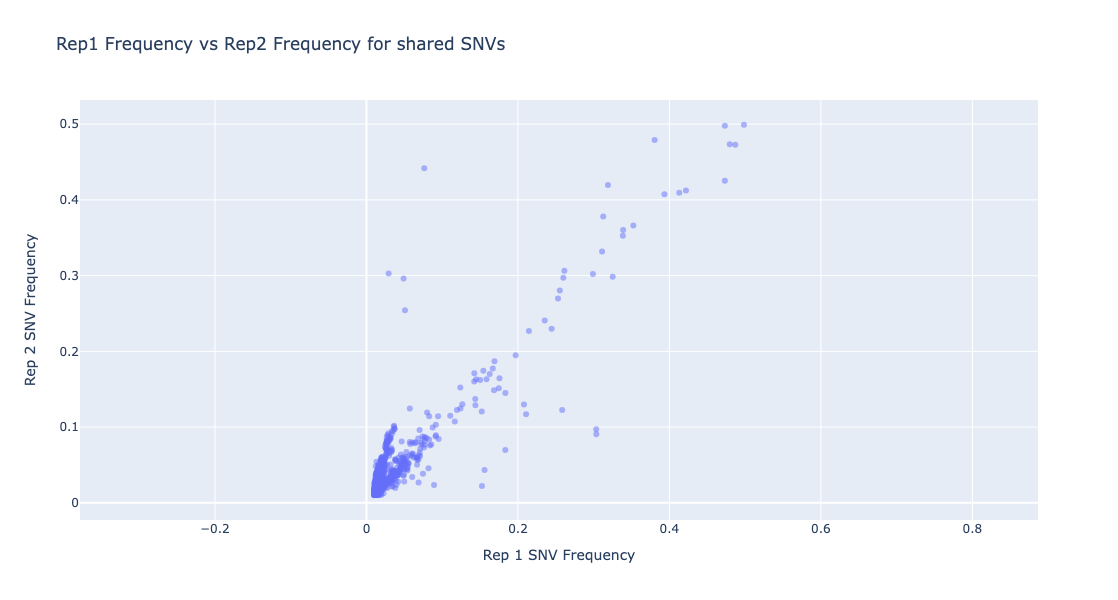

In [179]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(shared_vars_pivot, 
                 x="rep1_freq", 
                 y="rep2_freq", 
                 title="Rep1 Frequency vs Rep2 Frequency for shared SNVs",
                 labels={"rep1_freq": "Rep 1 SNV Frequency", "rep2_freq": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()


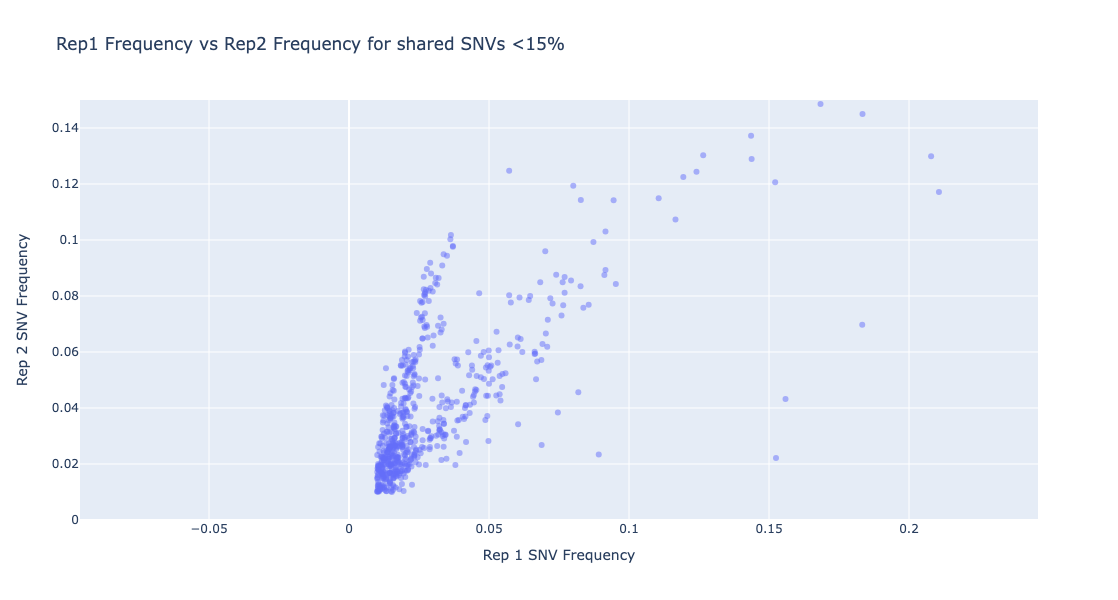

In [180]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(shared_vars_pivot, 
                 x="rep1_freq", 
                 y="rep2_freq", 
                 title="Rep1 Frequency vs Rep2 Frequency for shared SNVs <15%",
                 labels={"rep1_freq": "Rep 1 SNV Frequency", "rep2_freq": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

# Define axis limits
x_min, x_max = 0, 0.15  # Adjust as needed
y_min, y_max = 0, 0.15  # Adjust as needed

# Make the plot square and set axis limits
fig.update_layout(
    width=600,  
    height=600,  
    xaxis=dict(scaleanchor="y", range=[x_min, x_max]),  
    yaxis=dict(range=[y_min, y_max])
)

# Show the plot
fig.show()


In [204]:
shared_vars['avg_freq'] = shared_vars.groupby('sample_var')['frequency'].transform('mean')
shared_vars

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq
1278,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260
1313,HA,914,G,A,Ala300Ala,synonymous,1.02%,0.0102,replicate-1,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260
1286,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050
1331,PA,398,A,G,Glu133Gly,nonsynonymous,25.84%,0.2584,replicate-1,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,PA,193,T,C,Ser65Pro,nonsynonymous,9.16%,0.0916,replicate-1,wws_w1,PA_193,wws_w1_PA_193,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.09730
1960,PB1,151,G,A,Glu51Lys,nonsynonymous,9.06%,0.0906,replicate-2,wws_w1,PB1_151,wws_w1_PB1_151,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.19705
2011,PB1,151,G,A,Glu51Lys,nonsynonymous,30.35%,0.3035,replicate-1,wws_w1,PB1_151,wws_w1_PB1_151,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.19705
1972,PB2,1884,A,G,Glu627Glu,synonymous,3.15%,0.0315,replicate-2,wws_w1,PB2_1884,wws_w1_PB2_1884,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_synonymous,0.02260


In [205]:
shared_vars_dedupe = shared_vars.drop_duplicates(subset='sample_var')
shared_vars_dedupe

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq
1278,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260
1286,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03900
7,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,HA_1580,be_w3_HA_1580,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03170
9,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,NA_285,be_w3_NA_285,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.36930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,NS1,125,A,G,Gln40Arg,nonsynonymous,1.1%,0.0110,replicate-2,wws_w1,NS1_125,wws_w1_NS1_125,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01450
1949,NS1,311,G,T,Trp102Leu,nonsynonymous,1.16%,0.0116,replicate-2,wws_w1,NS1_311,wws_w1_NS1_311,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01415
1951,PA,193,T,C,Ser65Pro,nonsynonymous,10.3%,0.1030,replicate-2,wws_w1,PA_193,wws_w1_PA_193,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.09730
1960,PB1,151,G,A,Glu51Lys,nonsynonymous,9.06%,0.0906,replicate-2,wws_w1,PB1_151,wws_w1_PB1_151,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.19705


In [54]:
# ##need to drop samples that only have one rep- ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

# values_to_remove = ['cl_c2', 'cl_c1', 'rf_w1', 'bv_w5', 'blvu_adams', 'be_w2']

# # Drop rows where 'sample_ID' is in the list
# shared_vars = shared_vars[~shared_vars["sample_ID"].isin(values_to_remove)]

# # Reset index (optional, if needed)
# shared_vars = shared_vars.reset_index(drop=True)


In [206]:
unique_sampleIDs = shared_vars_dedupe['sample_ID'].unique()
print(unique_sampleIDs)

['be_w1' 'be_w3' 'blvu_chester' 'bo_w1' 'bv_w1' 'bv_w2' 'bv_w3' 'bv_w4'
 'bv_w6' 'bv_w7' 'bv_w8' 'cb_com1' 'cb_com2' 'cb_com3' 'cb_com4' 'cg_w1'
 'cg_w2' 'f_w1' 'g_com1' 'g_com2' 'gf_w1' 'gf_w2' 'gf_w3' 'kc_com1'
 'kc_com2' 'kc_com3' 'kc_com4' 'kc_com5' 'kc_com6' 'kc_com8' 'ms_w1'
 'ms_w2' 'rth_w1' 'rth_w2' 'rth_w3' 'tv_w1' 'wws_w1']


In [207]:
dropped_dupes_all_vars = pd.concat([shared_vars_dedupe, single_rep_vars], ignore_index=True)
dropped_dupes_all_vars.head(10)


,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq
0,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,HA_914,be_w1_HA_914,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260
1,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,PA_398,be_w1_PA_398,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050
2,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,HA_1151,be_w3_HA_1151,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03900
3,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,HA_1580,be_w3_HA_1580,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03170
4,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,NA_285,be_w3_NA_285,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.36930
5,NP,1305,G,A,Ala428Ala,synonymous,3.17%,0.0317,replicate-2,be_w3,NP_1305,be_w3_NP_1305,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.02995
6,NS1,329,A,G,Lys108Arg,nonsynonymous,4.49%,0.0449,replicate-2,be_w3,NS1_329,be_w3_NS1_329,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.04935
7,PA,1852,A,G,Thr618Ala,nonsynonymous,2.34%,0.0234,replicate-2,be_w3,PA_1852,be_w3_PA_1852,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.05630
8,PB1,2103,T,C,Pro701Pro,synonymous,1.76%,0.0176,replicate-2,be_w3,PB1_2103,be_w3_PB1_2103,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.01880
9,PB1,2190,C,T,Phe730Phe,synonymous,1.5%,0.0150,replicate-2,be_w3,PB1_2190,be_w3_PB1_2190,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.01680


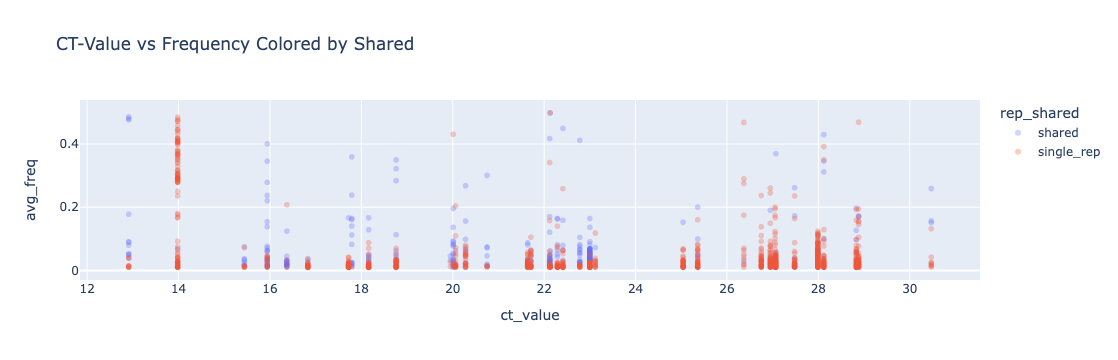

In [208]:
import plotly.express as px

fig = px.scatter(dropped_dupes_all_vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct-value": "CT Value", "frequency": "Frequency"},
                 opacity=0.3)  # Adjust transparency for better visibility

fig.show()


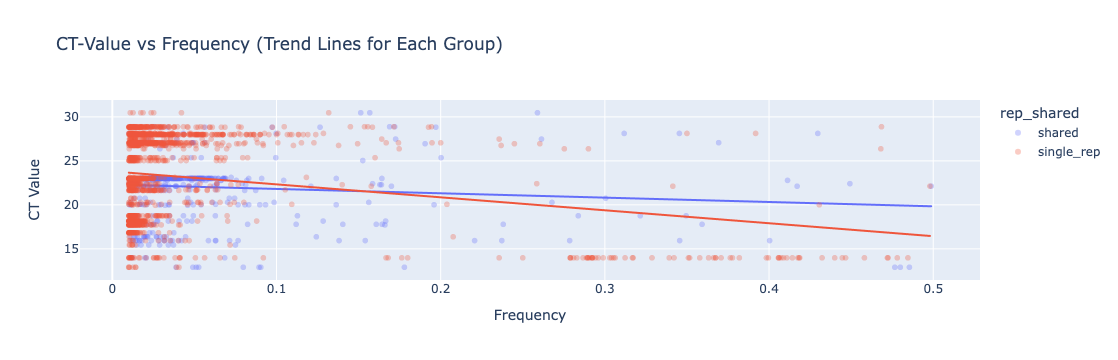

In [209]:
import plotly.express as px

fig = px.scatter(dropped_dupes_all_vars, 
                 y="ct_value", 
                 x="avg_freq", 
                 color="rep_shared",  # Colors by 'rep_shared'
                 trendline="ols",      # Adds a trend line for each group
                 title="CT-Value vs Frequency (Trend Lines for Each Group)",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


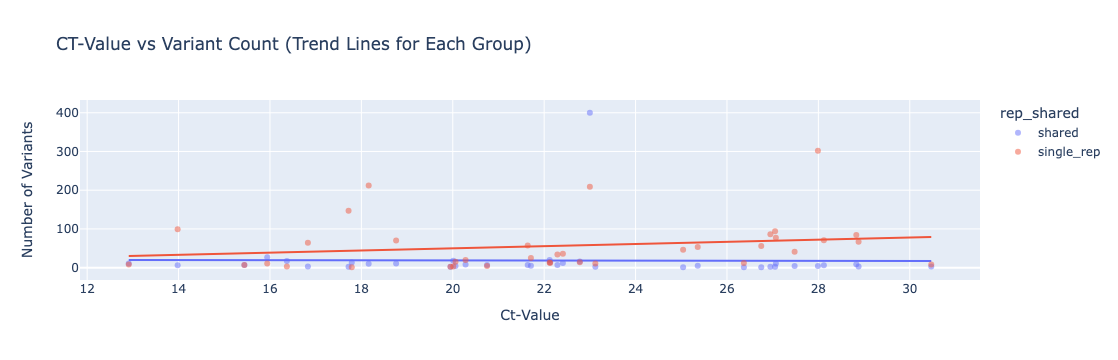

In [210]:
import plotly.express as px

# Count number of variants for each CT value and rep_shared group
variant_counts = dropped_dupes_all_vars.groupby(["ct_value", "rep_shared"]).size().reset_index(name="variant_count")

# Scatter plot with trend line
fig = px.scatter(variant_counts, 
                 x="ct_value", 
                 y="variant_count",  # Now plotting count of variants
                 color="rep_shared",  
                 trendline="ols",    
                 title="CT-Value vs Variant Count (Trend Lines for Each Group)",
                 labels={"ct_value": "Ct-Value", "variant_count": "Number of Variants"},
                 opacity=0.5)

fig.show()


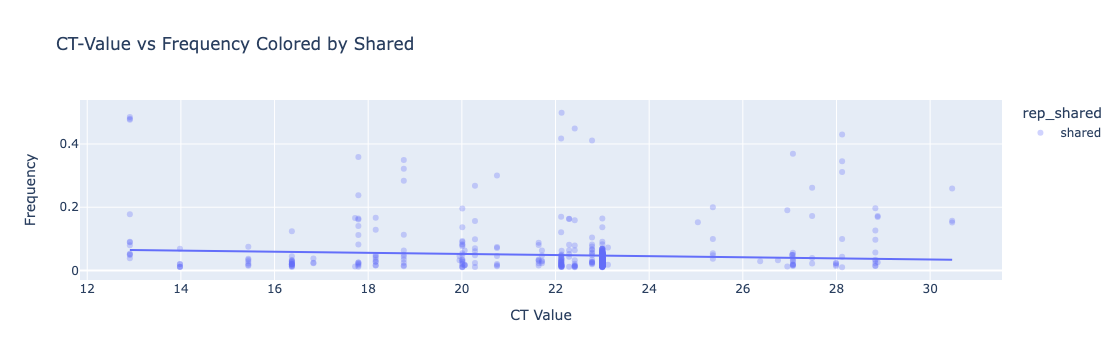

In [126]:
# fig = px.scatter(shared_vars, 
#                  x="ct_value", 
#                  y="avg_freq", 
#                  color="rep_shared", 
#                  title="CT-Value vs Frequency Colored by Shared",
#                  labels={"ct-value": "CT Value", "frequency": "Frequency"},
#                  opacity=0.3)  # Adjust transparency for better visibility

# fig.show()
import plotly.express as px

fig = px.scatter(shared_vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


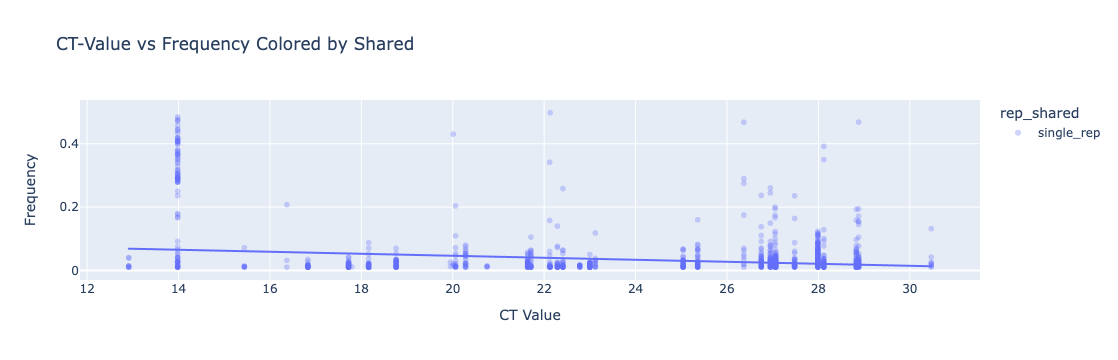

In [127]:
fig = px.scatter(single_rep_vars, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


In [ ]:
# shared_vars['dom_status'] = None  # or use np.nan for missing values


# comm_list = ['cb_com1', 'cb_com2', 'cb_com3', 'cb_com4', 'g_com1', 'g_com2', 'kc_com1',
#              'kc_com2', 'kc_com3', 'kc_com4', 'kc_com5', 'kc_com6', 'kc_com8']
# wild_list = ['be_w1', 'be_w3', 'blvu_chester', 'bo_w1', 'bv_w1', 'bv_w2', 'bv_w3', 'bv_w4',
#              'bv_w6', 'bv_w7', 'bv_w8', 'cg_w1', 'cg_w2', 'f_w1', 'gf_w2', 'gf_w3',
#             'ms_w1', 'ms_w2', 'rth_w1', 'rth_w2', 'rth_w3', 'tv_w1', 'wws_w1']

# shared_vars.loc[shared_vars['sample_ID'].isin(comm_list), 'dom_status'] = 'domestic'
# shared_vars.loc[shared_vars['sample_ID'].isin(wild_list), 'dom_status'] = 'wild'
# shared_vars.tail(15)

In [57]:
# define colors 

# blue/red scheme 1 (desaturated)
dom_color = "#C75643"
wild_color = "#545AB7"


# blue/red scheme 1 (desaturated)
dom_nonsyn_color = "#545AB7"
dom_syn_color = "#98B4DA"
wild_nonsyn_color = "#C75643"
wild_syn_color = "#E6B692"

In [ ]:
# shared_vars['color'] = shared_vars['dom_status'] + "_" + shared_vars['synonymous/nonsynonymous']
# shared_vars.head()

In [215]:
shared_vars_dedupe.tail(20)

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,gene_pos,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq
111,NA,1020,T,C,Ser339Pro,nonsynonymous,3.55%,0.0355,replicate-2,rth_w2,NA_1020,rth_w2_NA_1020,shared,wild,25.36,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.03710
128,PB2,539,C,T,Ser179Leu,nonsynonymous,5.24%,0.0524,replicate-2,rth_w2,PB2_539,rth_w2_PB2_539,shared,wild,25.36,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.05415
129,PB2,1472,G,A,Ser490Asn,nonsynonymous,6.91%,0.0691,replicate-2,rth_w2,PB2_1472,rth_w2_PB2_1472,shared,wild,25.36,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.04800
168,NA,155,T,A,Asn50Lys,nonsynonymous,4.2%,0.0420,replicate-2,rth_w3,NA_155,rth_w3_NA_155,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.04330
174,NA,1074,G,A,Val357Ile,nonsynonymous,1.03%,0.0103,replicate-2,rth_w3,NA_1074,rth_w3_NA_1074,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.01025
185,NP,1423,G,A,Asp468Asn,nonsynonymous,47.89%,0.4789,replicate-2,rth_w3,NP_1423,rth_w3_NP_1423,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.42970
186,NS1,359,G,A,Arg118Lys,nonsynonymous,29.84%,0.2984,replicate-2,rth_w3,NS1_359,rth_w3_NS1_359,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.31175
196,PB2,29,A,G,Asp9Gly,nonsynonymous,37.82%,0.3782,replicate-2,rth_w3,PB2_29,rth_w3_PB2_29,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_nonsynonymous,0.34540
197,PB2,423,G,A,Lys140Lys,synonymous,11.94%,0.1194,replicate-2,rth_w3,PB2_423,rth_w3_PB2_423,shared,wild,28.12,acciptriformes,PA_unknown,2024-01-31,wild_synonymous,0.09975
3349,PB2,1171,G,A,Asp390Asn,nonsynonymous,3.13%,0.0313,replicate-2,tv_w1,PB2_1171,tv_w1_PB2_1171,shared,wild,19.95,acciptriformes,Lancaster,2023-03-17,wild_nonsynonymous,0.03215


In [356]:
shared_vars_dedupe['order_domstat'] = shared_vars_dedupe['order'] + "_" + shared_vars_dedupe['domestic_status']
shared_vars_dedupe.head()

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/3996495761.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat
1278,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.0126,<3%,acciptriformes_wild
1286,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.1905,10-20%,acciptriformes_wild
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0390,3-10%,acciptriformes_wild
7,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0317,3-10%,acciptriformes_wild
9,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.3693,30-40%,acciptriformes_wild


In [362]:
# shared_vars_dedupe['sample_ID'].unique()
shared_vars_dedupe

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat
1278,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260,<3%,acciptriformes_wild
1286,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050,10-20%,acciptriformes_wild
3,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03900,3-10%,acciptriformes_wild
7,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03170,3-10%,acciptriformes_wild
9,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.36930,30-40%,acciptriformes_wild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,NS1,125,A,G,Gln40Arg,nonsynonymous,1.1%,0.0110,replicate-2,wws_w1,...,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01450,<3%,anseriformes_wild
1949,NS1,311,G,T,Trp102Leu,nonsynonymous,1.16%,0.0116,replicate-2,wws_w1,...,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01415,<3%,anseriformes_wild
1951,PA,193,T,C,Ser65Pro,nonsynonymous,10.3%,0.1030,replicate-2,wws_w1,...,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.09730,3-10%,anseriformes_wild
1960,PB1,151,G,A,Glu51Lys,nonsynonymous,9.06%,0.0906,replicate-2,wws_w1,...,shared,wild,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.19705,10-20%,anseriformes_wild


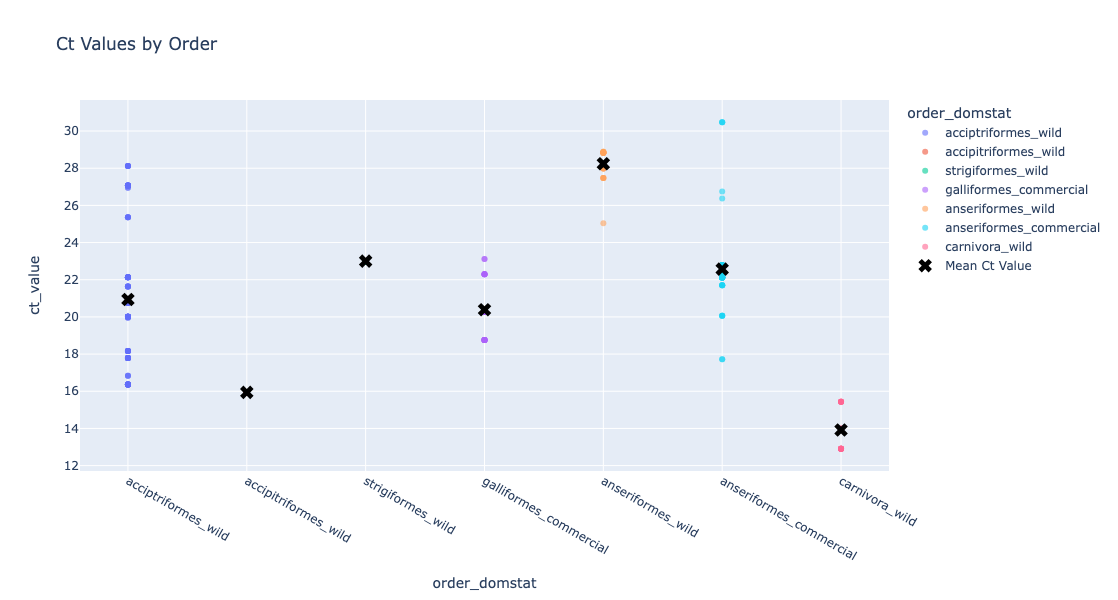

In [357]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Compute mean values for each category
mean_ct = shared_vars_dedupe.groupby('order_domstat', as_index=False)['ct_value'].mean()

# Create scatter plot for individual values
fig = px.scatter(
    shared_vars_dedupe,
    x='order_domstat',
    y='ct_value',
    color='order_domstat',
    title="Ct Values by Order",
    hover_data=['sample_ID'],
    opacity=0.6,  # Make points slightly transparent
    width=950, height=600
)

# Add scatter plot for mean values
fig.add_trace(
    go.Scatter(
        x=mean_ct['order_domstat'],
        y=mean_ct['ct_value'],
        mode='markers',
        marker=dict(size=12, color='black', symbol='x'),  # Larger black X markers for means
        name='Mean Ct Value'
    )
)

# Show the plot
fig.show()


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1486975418.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1486975418.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



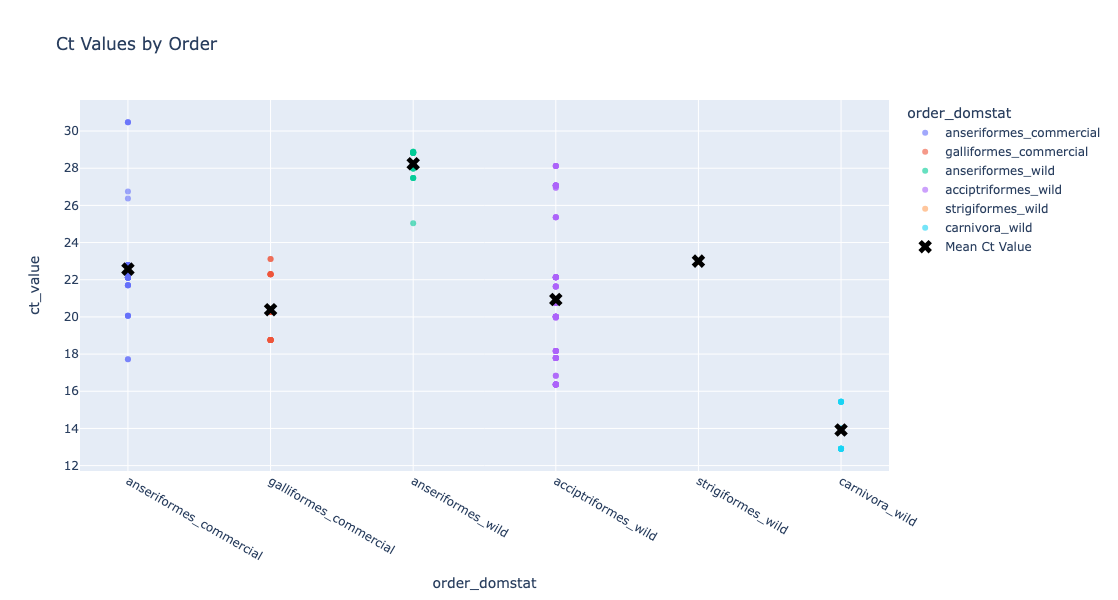

In [360]:


import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Define the specific order for 'order_domwild'
custom_order = ["anseriformes_commercial", "galliformes_commercial", "anseriformes_wild", "acciptriformes_wild", "strigiformes_wild", "carnivora_wild"]  # Replace with your actual categories

# Convert 'order_domwild' to a categorical type with the specified order
shared_vars_dedupe['order_domstat'] = pd.Categorical(shared_vars_dedupe['order_domstat'], categories=custom_order, ordered=True)
mean_ct['order_domstat'] = pd.Categorical(mean_ct['order_domstat'], categories=custom_order, ordered=True)

# Compute mean values for each category
mean_ct = shared_vars_dedupe.groupby('order_domstat', as_index=False)['ct_value'].mean()

# Create scatter plot for individual values
fig = px.scatter(
    shared_vars_dedupe,
    x='order_domstat',
    y='ct_value',
    color='order_domstat',
    title="Ct Values by Order",
    hover_data=['sample_ID'],
    opacity=0.6,
    width=950, height=600,
    category_orders={"order_domstat": custom_order}  # Ensure the correct order in the plot
)

# Add scatter plot for mean values
fig.add_trace(
    go.Scatter(
        x=mean_ct['order_domstat'],
        y=mean_ct['ct_value'],
        mode='markers',
        marker=dict(size=12, color='black', symbol='x'),
        name='Mean Ct Value'
    )
)

# Show the plot
fig.show()


In [364]:
SNVsCounts_by_group = shared_vars_dedupe.groupby('color').size()
print(SNVsCounts_by_group)


color
commercial_nonsynonymous     50
commercial_synonymous        42
wild_nonsynonymous          102
wild_stop_gained              1
wild_synonymous             486
dtype: int64


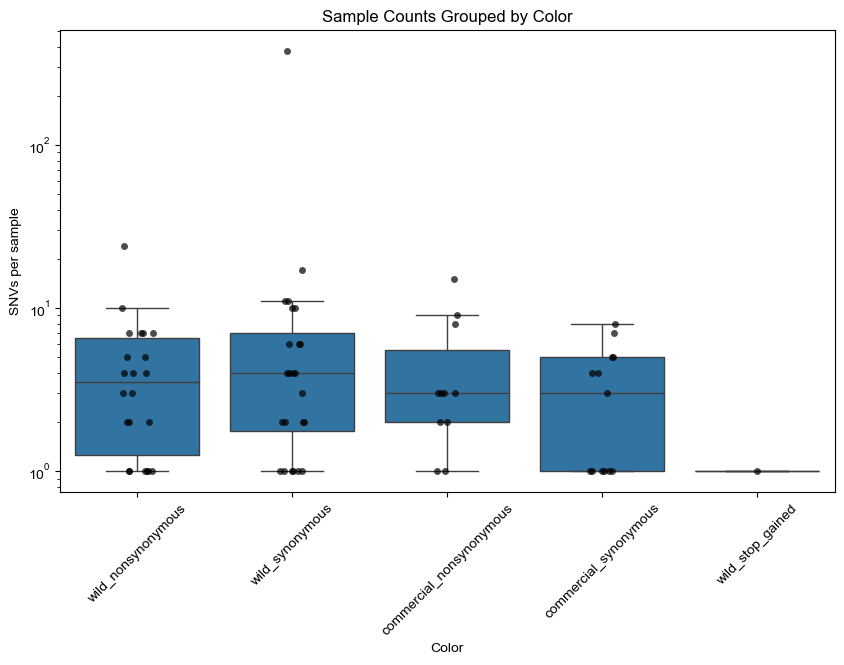

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each sample_ID within each color group
sample_counts = shared_vars_dedupe.groupby(['sample_ID', 'color']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(data=sample_counts, x='color', y='count', showfliers=False)  # Hide outliers to avoid overlap

# Overlay individual points with jitter
sns.stripplot(data=sample_counts, x='color', y='count', color='black', jitter=True, alpha=0.7)

# Labels and title
plt.xlabel('Color')
plt.xticks(rotation=45)  # Adjust angle as needed
plt.ylabel('SNVs per sample')
plt.yscale('log')
plt.title('Sample Counts Grouped by Color')

plt.show()


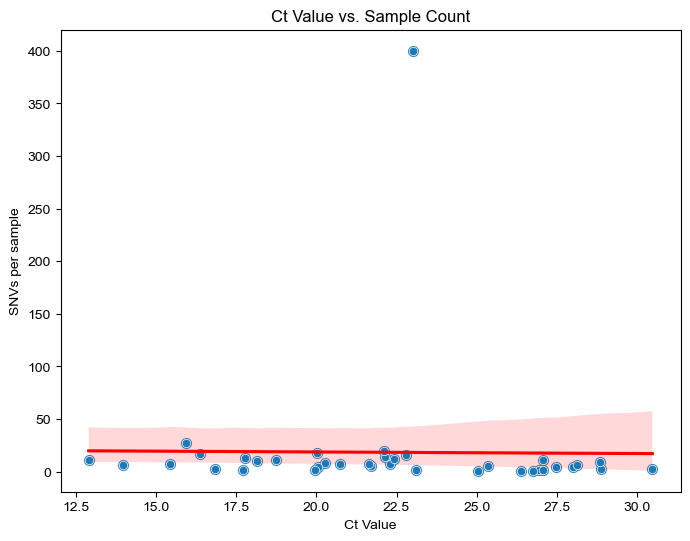

In [392]:
# Count occurrences of each sample_ID
sample_counts = shared_vars_dedupe['sample_ID'].value_counts().reset_index()
sample_counts.columns = ['sample_ID', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = shared_vars_dedupe[['sample_ID', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample_ID')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count')


plt.show()


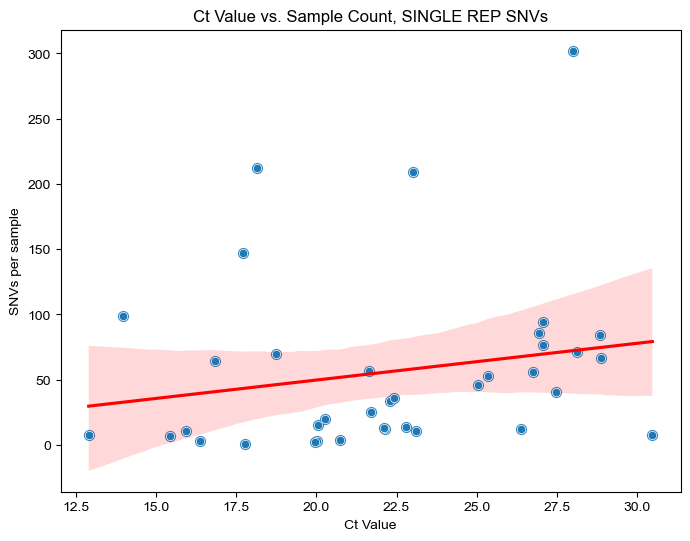

In [394]:
# Count occurrences of each sample_ID
sample_counts = single_rep_vars['sample_ID'].value_counts().reset_index()
sample_counts.columns = ['sample_ID', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = shared_vars_dedupe[['sample_ID', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample_ID')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SINGLE REP SNVs')


plt.show()


In [269]:
import os
import pandas as pd

# Ensure the new folder exists
output_folder = 'iSNVs_by_sample'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each unique sample_ID
for sample_id in shared_vars_dedupe['sample_ID'].unique():
    # Filter the dataframe for the current sample_id and select the relevant columns
    subset_df = shared_vars_dedupe[shared_vars_dedupe['sample_ID'] == sample_id][['gene_pos', 'avg_freq']]
    
    # Define the filename based on the sample_id and append '_SNVs.csv'
    filename = f"{sample_id}_SNVs.csv"
    file_path = os.path.join(output_folder, filename)
    
    # Save the subset dataframe to a CSV file
    subset_df.to_csv(file_path, index=False)

    print(f"Saved {filename} to {output_folder}")


Saved be_w1_SNVs.csv to iSNVs_by_sample
Saved be_w3_SNVs.csv to iSNVs_by_sample
Saved blvu_chester_SNVs.csv to iSNVs_by_sample
Saved bo_w1_SNVs.csv to iSNVs_by_sample
Saved bv_w1_SNVs.csv to iSNVs_by_sample
Saved bv_w2_SNVs.csv to iSNVs_by_sample
Saved bv_w3_SNVs.csv to iSNVs_by_sample
Saved bv_w4_SNVs.csv to iSNVs_by_sample
Saved bv_w6_SNVs.csv to iSNVs_by_sample
Saved bv_w7_SNVs.csv to iSNVs_by_sample
Saved bv_w8_SNVs.csv to iSNVs_by_sample
Saved cb_com1_SNVs.csv to iSNVs_by_sample
Saved cb_com2_SNVs.csv to iSNVs_by_sample
Saved cb_com3_SNVs.csv to iSNVs_by_sample
Saved cb_com4_SNVs.csv to iSNVs_by_sample
Saved cg_w1_SNVs.csv to iSNVs_by_sample
Saved cg_w2_SNVs.csv to iSNVs_by_sample
Saved f_w1_SNVs.csv to iSNVs_by_sample
Saved g_com1_SNVs.csv to iSNVs_by_sample
Saved g_com2_SNVs.csv to iSNVs_by_sample
Saved gf_w1_SNVs.csv to iSNVs_by_sample
Saved gf_w2_SNVs.csv to iSNVs_by_sample
Saved gf_w3_SNVs.csv to iSNVs_by_sample
Saved kc_com1_SNVs.csv to iSNVs_by_sample
Saved kc_com2_SNVs.csv

In [270]:
##version with syn_non and dom_stat so I can make the freq spectrums based on that
# Ensure the new folder exists
output_folder = 'iSNVs_by_sample_nonsyn_domstat'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each unique sample_ID
for sample_id in shared_vars_dedupe['sample_ID'].unique():
    # Filter the dataframe for the current sample_id and select the relevant columns
    subset_df = shared_vars_dedupe[shared_vars_dedupe['sample_ID'] == sample_id][['gene_pos', 'avg_freq', 'synonymous/nonsynonymous', 'color']]
    
    # Define the filename based on the sample_id and append '_SNVs.csv'
    filename = f"{sample_id}_SNVs.csv"
    file_path = os.path.join(output_folder, filename)
    
    # Save the subset dataframe to a CSV file
    subset_df.to_csv(file_path, index=False)

    print(f"Saved {filename} to {output_folder}")


Saved be_w1_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved be_w3_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved blvu_chester_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bo_w1_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w1_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w2_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w3_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w4_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w6_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w7_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved bv_w8_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cb_com1_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cb_com2_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cb_com3_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cb_com4_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cg_w1_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved cg_w2_SNVs.csv to iSNVs_by_sample_nonsyn_domstat
Saved f_w1_SNVs.csv to iSNVs_by_sample_nonsyn_doms

In [272]:
import os
import pandas as pd

# Ensure the new folder exists
output_folder = 'iSNVs_by_sample_nonsyn_domstat/syn_non'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each unique sample_ID
for sample_id in shared_vars_dedupe['sample_ID'].unique():
    # Filter the dataframe for the current sample_id
    sample_df = shared_vars_dedupe[shared_vars_dedupe['sample_ID'] == sample_id]
    
    # Create separate DataFrames for synonymous and nonsynonymous SNVs
    syn_df = sample_df[sample_df['synonymous/nonsynonymous'] == 'synonymous'][['gene_pos', 'avg_freq', 'color']]
    nonsyn_df = sample_df[sample_df['synonymous/nonsynonymous'] == 'nonsynonymous'][['gene_pos', 'avg_freq', 'color']]

    # Define filenames
    syn_filename = f"{sample_id}_synonymous_SNVs.csv"
    nonsyn_filename = f"{sample_id}_nonsynonymous_SNVs.csv"

    # Define file paths
    syn_file_path = os.path.join(output_folder, syn_filename)
    nonsyn_file_path = os.path.join(output_folder, nonsyn_filename)

    # Save the DataFrames to CSV files
    syn_df.to_csv(syn_file_path, index=False)
    nonsyn_df.to_csv(nonsyn_file_path, index=False)

    print(f"Saved {syn_filename} and {nonsyn_filename} to {output_folder}")


Saved be_w1_synonymous_SNVs.csv and be_w1_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved be_w3_synonymous_SNVs.csv and be_w3_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved blvu_chester_synonymous_SNVs.csv and blvu_chester_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bo_w1_synonymous_SNVs.csv and bo_w1_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w1_synonymous_SNVs.csv and bv_w1_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w2_synonymous_SNVs.csv and bv_w2_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w3_synonymous_SNVs.csv and bv_w3_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w4_synonymous_SNVs.csv and bv_w4_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w6_synonymous_SNVs.csv and bv_w6_nonsynonymous_SNVs.csv to iSNVs_by_sample_nonsyn_domstat/syn_non
Saved bv_w7_synonymous_

In [396]:
import os
import pandas as pd

# Ensure the new folder exists
output_folder = 'iSNVs_by_sample_nonsyn_domstat/color'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each unique sample_ID
for sample_id in shared_vars_dedupe['sample_ID'].unique():
    # Filter the dataframe for the current sample_id
    sample_df = shared_vars_dedupe[shared_vars_dedupe['sample_ID'] == sample_id]
    
    # Create separate DataFrames for synonymous and nonsynonymous SNVs
    wsyn_df = sample_df[sample_df['color'] == 'wild_synonymous'][['gene_pos', 'avg_freq', 'color']]
    wnonsyn_df = sample_df[sample_df['color'] == 'wild_nonsynonymous'][['gene_pos', 'avg_freq', 'color']]
    csyn_df = sample_df[sample_df['color'] == 'commercial_synonymous'][['gene_pos', 'avg_freq', 'color']]
    cnonsyn_df = sample_df[sample_df['color'] == 'commercial_nonsynonymous'][['gene_pos', 'avg_freq', 'color']]
    
    # Define filenames
    wsyn_filename = f"{sample_id}_wild_synonymous_SNVs.csv"
    wnonsyn_filename = f"{sample_id}_wild_nonsynonymous_SNVs.csv"
    csyn_filename = f"{sample_id}_commercial_synonymous_SNVs.csv"
    cnonsyn_filename = f"{sample_id}_commercial_nonsynonymous_SNVs.csv"

    # Define file paths
    wsyn_file_path = os.path.join(output_folder, wsyn_filename)
    wnonsyn_file_path = os.path.join(output_folder, wnonsyn_filename)
    csyn_file_path = os.path.join(output_folder, csyn_filename)
    cnonsyn_file_path = os.path.join(output_folder, cnonsyn_filename)
    
    # Check if DataFrames are non-empty before saving
    if not wsyn_df.empty:
        wsyn_df.to_csv(wsyn_file_path, index=False)
    if not wnonsyn_df.empty:
        wnonsyn_df.to_csv(wnonsyn_file_path, index=False)
    if not csyn_df.empty:
        csyn_df.to_csv(csyn_file_path, index=False)
    if not cnonsyn_df.empty:
        cnonsyn_df.to_csv(cnonsyn_file_path, index=False)
        
    # print(f"Saved files for {sample_id} if not empty")


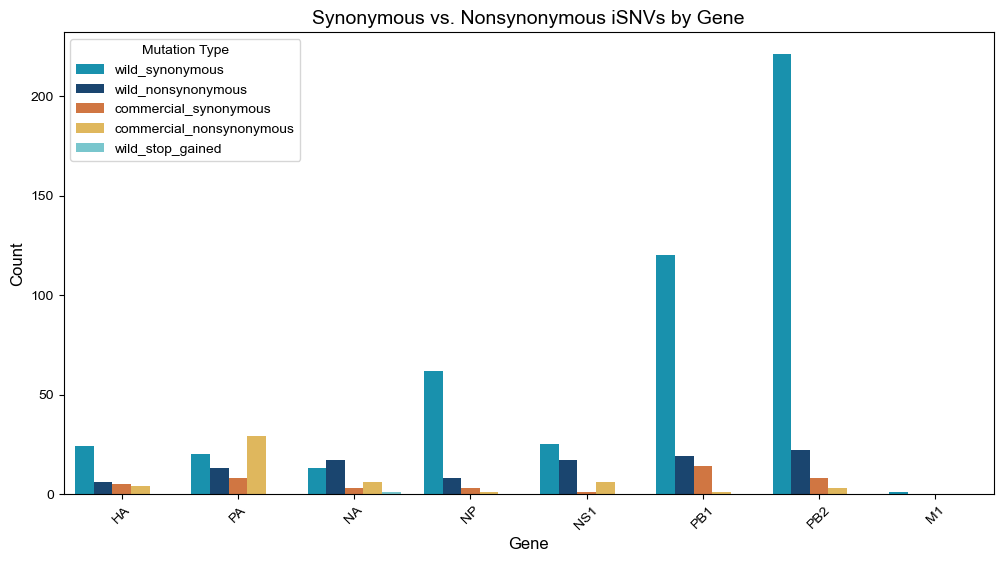

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: If your dataframe is named df
plt.figure(figsize=(12, 6))  # Adjust figure size

sns.countplot(data=shared_vars_dedupe, x="gene", hue="color", palette=["#00A1C6", "#0c457d", "#e8702a","#F5BF47", "#6bd2db" ])

# Labels and title
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Synonymous vs. Nonsynonymous iSNVs by Gene", fontsize=14)
plt.xticks(rotation=45)  # Rotate gene names if necessary
plt.legend(title="Mutation Type")

plt.show()


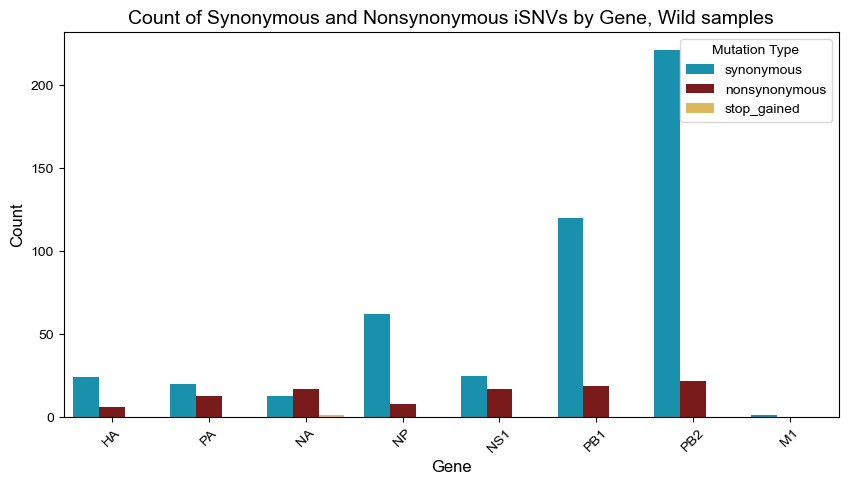

In [250]:
wild_non_to_syn = shared_vars_dedupe[shared_vars_dedupe["domestic_status"] == "wild"]

# Example: If your dataframe is named df
plt.figure(figsize=(10, 5))  # Adjust figure size

sns.countplot(data=wild_non_to_syn, x="gene", hue="synonymous/nonsynonymous", palette=["#00A1C6", "#890B0B","#F5BF47" ])

# Labels and title
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Synonymous and Nonsynonymous iSNVs by Gene, Wild samples", fontsize=14)
plt.xticks(rotation=45)  # Rotate gene names if necessary
plt.legend(title="Mutation Type")

plt.show()

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1888341479.py:6: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



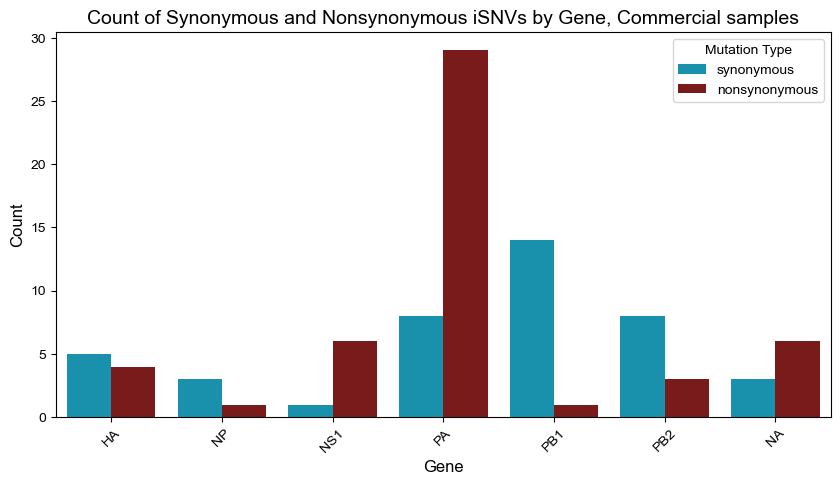

In [259]:
com_non_to_syn = shared_vars_dedupe[shared_vars_dedupe["domestic_status"] == "commercial"]

# Example: If your dataframe is named df
plt.figure(figsize=(10, 5))  # Adjust figure size

sns.countplot(data=com_non_to_syn, x="gene", hue="synonymous/nonsynonymous", palette=["#00A1C6", "#890B0B","#F5BF47" ])

# Labels and title
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Synonymous and Nonsynonymous iSNVs by Gene, Commercial samples", fontsize=14)
plt.xticks(rotation=45)  # Rotate gene names if necessary
plt.legend(title="Mutation Type")

plt.show()

In [398]:
shared_vars_dedupe.to_csv('output_dfs/2025_03_13_repshared_SNVs_allsamples.tsv', sep='\t', index=False)

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2383094667.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2383094667.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



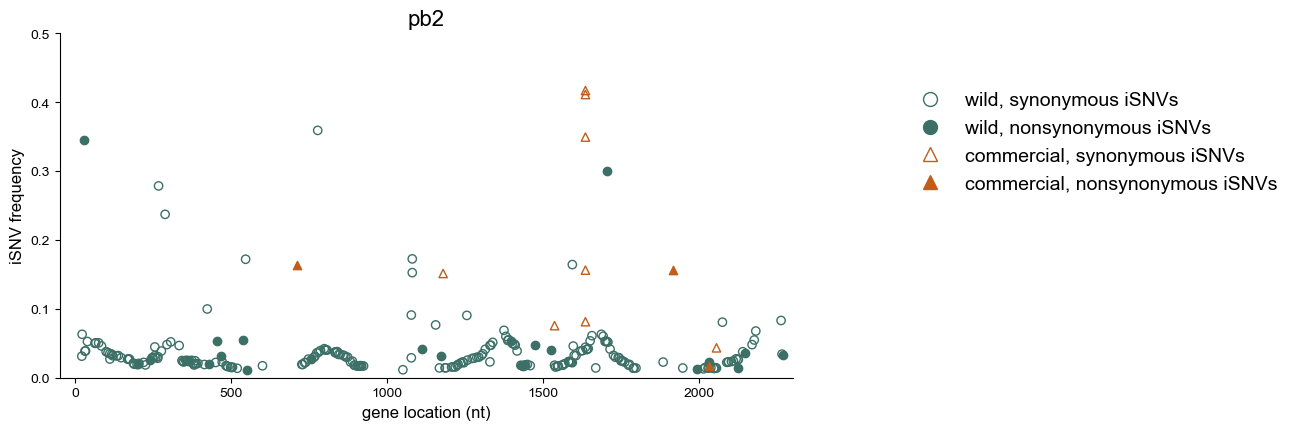

In [293]:
##define subset dfs by gene and category
pb2 = shared_vars_dedupe[shared_vars_dedupe["gene"] == "PB2"]
w_syn_pb2 = pb2[pb2["color"] == "wild_synonymous"]
w_nonsyn_pb2 = pb2[pb2["color"] == "wild_nonsynonymous"]
c_syn_pb2 = pb2[pb2["color"] == "commercial_synonymous"]
c_nonsyn_pb2 = pb2[pb2["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


pb2['color'] = pb2['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # PB2

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('pb2', fontname='Arial', fontsize=16)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.5)
ax1.set_xlim(-50, 2300)
ax1.set_xticks([0, 500, 1000, 1500, 2000])


ax1.scatter(x=w_syn_pb2['reference_position'], y=w_syn_pb2['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_pb2['reference_position'], y=w_nonsyn_pb2['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_pb2['reference_position'], y=c_syn_pb2['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_pb2['reference_position'], y=c_nonsyn_pb2['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/PB2.pdf", bbox_inches='tight', dpi=300)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/728354945.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/728354945.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



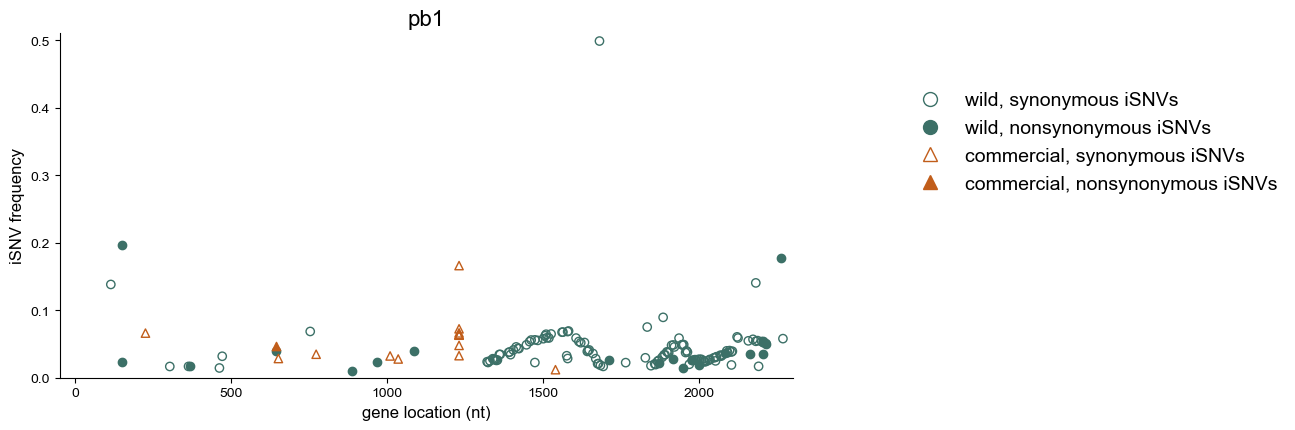

In [294]:
##define subset dfs by gene and category
pb1 = shared_vars_dedupe[shared_vars_dedupe["gene"] == "PB1"]
w_syn_pb1 = pb1[pb1["color"] == "wild_synonymous"]
w_nonsyn_pb1 = pb1[pb1["color"] == "wild_nonsynonymous"]
c_syn_pb1 = pb1[pb1["color"] == "commercial_synonymous"]
c_nonsyn_pb1 = pb1[pb1["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


pb1['color'] = pb1['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # pb1

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('pb1', fontname='Arial', fontsize=16)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.51)
ax1.set_xlim(-50, 2300)
ax1.set_xticks([0, 500, 1000, 1500, 2000])


ax1.scatter(x=w_syn_pb1['reference_position'], y=w_syn_pb1['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_pb1['reference_position'], y=w_nonsyn_pb1['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_pb1['reference_position'], y=c_syn_pb1['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_pb1['reference_position'], y=c_nonsyn_pb1['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/pb1.pdf", bbox_inches='tight', dpi=300)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/904271158.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/904271158.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



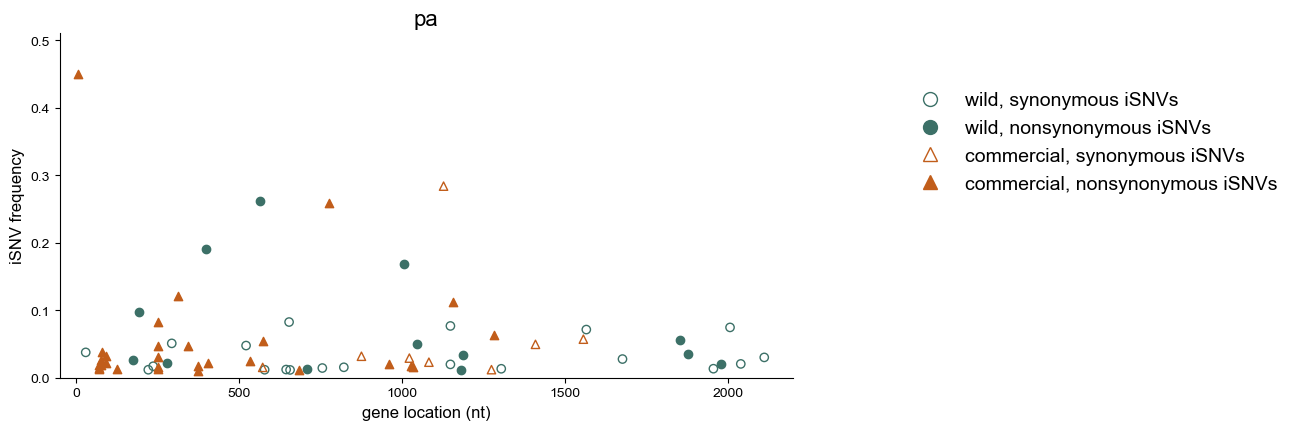

In [295]:
##define subset dfs by gene and category
pa = shared_vars_dedupe[shared_vars_dedupe["gene"] == "PA"]
w_syn_pa = pa[pa["color"] == "wild_synonymous"]
w_nonsyn_pa = pa[pa["color"] == "wild_nonsynonymous"]
c_syn_pa = pa[pa["color"] == "commercial_synonymous"]
c_nonsyn_pa = pa[pa["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


pa['color'] = pa['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # pa

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('pa', fontname='Arial', fontsize=16)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.51)
ax1.set_xlim(-50, 2200)
ax1.set_xticks([0, 500, 1000, 1500, 2000])


ax1.scatter(x=w_syn_pa['reference_position'], y=w_syn_pa['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_pa['reference_position'], y=w_nonsyn_pa['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_pa['reference_position'], y=c_syn_pa['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_pa['reference_position'], y=c_nonsyn_pa['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("iSNVs_by_gene_pa.pdf", bbox_inches='tight', dpi=300)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/627135096.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/627135096.py:67: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



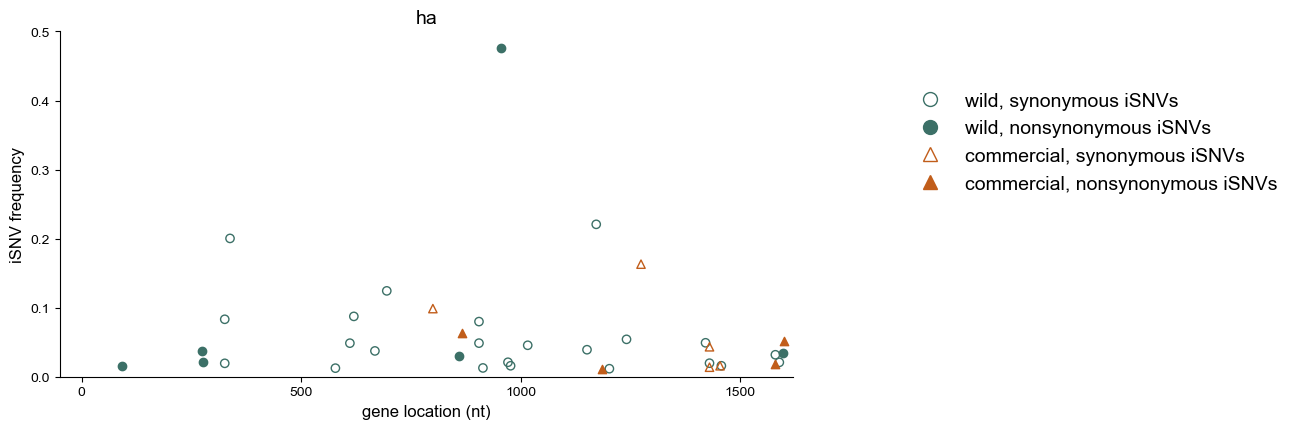

In [274]:
##define subset dfs by gene and category
ha = shared_vars_dedupe[shared_vars_dedupe["gene"] == "HA"]
w_syn_ha = ha[ha["color"] == "wild_synonymous"]
w_nonsyn_ha = ha[ha["color"] == "wild_nonsynonymous"]
c_syn_ha = ha[ha["color"] == "commercial_synonymous"]
c_nonsyn_ha = ha[ha["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


ha['color'] = ha['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # ha

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('ha', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.5)
ax1.set_xlim(-50,1620)
ax1.set_xticks([0, 500, 1000, 1500])



ax1.scatter(x=w_syn_ha['reference_position'], y=w_syn_ha['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_ha['reference_position'], y=w_nonsyn_ha['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_ha['reference_position'], y=c_syn_ha['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_ha['reference_position'], y=c_nonsyn_ha['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/ha.pdf", bbox_inches='tight', dpi=300)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1913975852.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1913975852.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



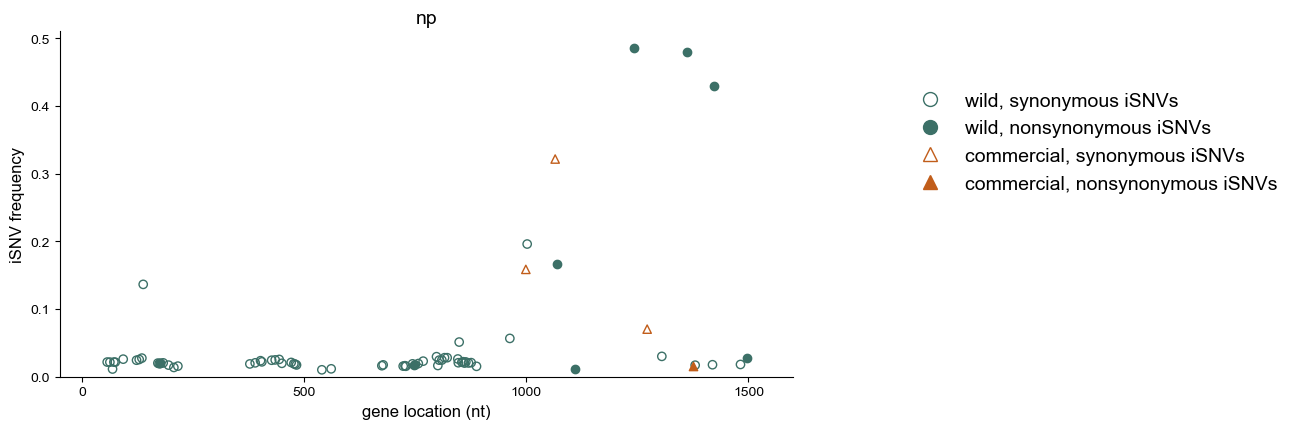

In [279]:
##define subset dfs by gene and category
np = shared_vars_dedupe[shared_vars_dedupe["gene"] == "NP"]
w_syn_np = np[np["color"] == "wild_synonymous"]
w_nonsyn_np = np[np["color"] == "wild_nonsynonymous"]
c_syn_np = np[np["color"] == "commercial_synonymous"]
c_nonsyn_np = np[np["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


np['color'] = np['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # np

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('np', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.51)
ax1.set_xlim(-50, 1600)
ax1.set_xticks([0, 500, 1000, 1500])


ax1.scatter(x=w_syn_np['reference_position'], y=w_syn_np['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_np['reference_position'], y=w_nonsyn_np['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_np['reference_position'], y=c_syn_np['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_np['reference_position'], y=c_nonsyn_np['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/np.pdf", bbox_inches='tight', dpi=300)


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/3352078849.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/3352078849.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



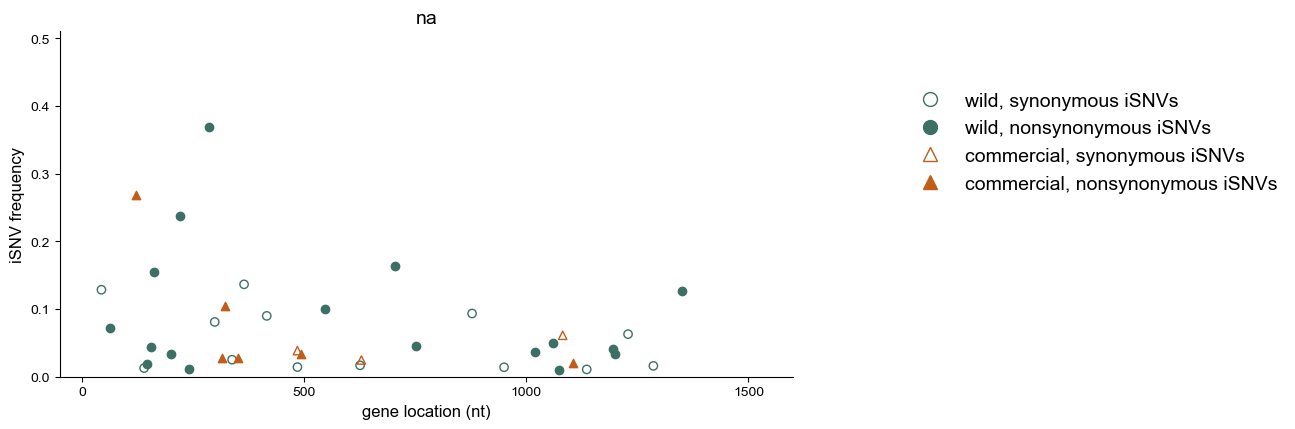

In [287]:
##define subset dfs by gene and category
na = shared_vars_dedupe[shared_vars_dedupe["gene"] == "NA"]
w_syn_na = na[na["color"] == "wild_synonymous"]
w_nonsyn_na = na[na["color"] == "wild_nonsynonymous"]
c_syn_na = na[na["color"] == "commercial_synonymous"]
c_nonsyn_na = na[na["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


na['color'] = na['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # na

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('na', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.51)
ax1.set_xlim(-50, 1600)
ax1.set_xticks([0, 500, 1000, 1500])


ax1.scatter(x=w_syn_na['reference_position'], y=w_syn_na['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_na['reference_position'], y=w_nonsyn_na['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_na['reference_position'], y=c_syn_na['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_na['reference_position'], y=c_nonsyn_na['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/na.pdf", bbox_inches='tight', dpi=300)

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1279767784.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/1279767784.py:66: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



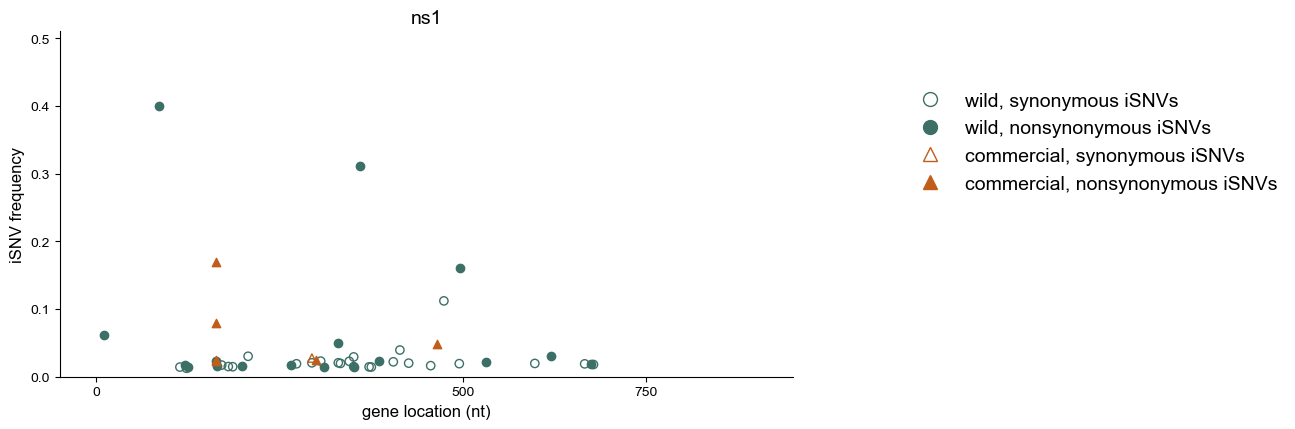

In [290]:
##define subset dfs by gene and category
ns1 = shared_vars_dedupe[shared_vars_dedupe["gene"] == "NS1"]
w_syn_ns1 = ns1[ns1["color"] == "wild_synonymous"]
w_nonsyn_ns1 = ns1[ns1["color"] == "wild_nonsynonymous"]
c_syn_ns1 = ns1[ns1["color"] == "commercial_synonymous"]
c_nonsyn_ns1 = ns1[ns1["color"] == "commercial_nonsynonymous"]

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec

wild_clr = '#3C7067'
comm_clr = '#C15D1A'


ns1['color'] = ns1['color'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # ns1

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('ns1', fontname='Arial', fontsize=14)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.51)
ax1.set_xlim(-50, 950)
ax1.set_xticks([0, 500, 750])


ax1.scatter(x=w_syn_ns1['reference_position'], y=w_syn_ns1['avg_freq'], marker='o', facecolors='none', edgecolors=wild_clr)
ax1.scatter(x=w_nonsyn_ns1['reference_position'], y=w_nonsyn_ns1['avg_freq'], marker='o', facecolors=wild_clr, edgecolors=wild_clr)
ax1.scatter(x=c_syn_ns1['reference_position'], y=c_syn_ns1['avg_freq'], marker='^', facecolors='none', edgecolors=comm_clr)
ax1.scatter(x=c_nonsyn_ns1['reference_position'], y=c_nonsyn_ns1['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
w_syn = mlines.Line2D([], [], marker='o', markerfacecolor='None', markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, synonymous iSNVs')
w_nonsyn = mlines.Line2D([], [], marker='o', markerfacecolor=wild_clr, markeredgecolor=wild_clr, linestyle='None', markersize=10, label='wild, nonsynonymous iSNVs')
c_syn = mlines.Line2D([], [], marker='^', markerfacecolor='None', markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, synonymous iSNVs')
c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[w_syn, w_nonsyn, c_syn, c_nonsyn], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/ns1.pdf", bbox_inches='tight', dpi=300)

In [291]:
print(f"Number of samples in pb2: {pb2['sample_ID'].nunique()}")
print(f"Number of samples in pb1: {pb1['sample_ID'].nunique()}")
print(f"Number of samples in pa: {pa['sample_ID'].nunique()}")
print(f"Number of samples in ha: {ha['sample_ID'].nunique()}")
print(f"Number of samples in np: {np['sample_ID'].nunique()}")
print(f"Number of samples in na: {na['sample_ID'].nunique()}")
print(f"Number of samples in ns1: {ns1['sample_ID'].nunique()}")


Number of samples in pb2: 26
Number of samples in pb1: 24
Number of samples in pa: 23
Number of samples in ha: 20
Number of samples in np: 12
Number of samples in na: 19
Number of samples in ns1: 17


In [217]:
invalid_colors = pb2[~pb2['color'].isin(color_map.keys())]
print(invalid_colors)

Empty DataFrame
Columns: [gene, reference_position, reference_allele, variant_allele, coding_region_change, synonymous/nonsynonymous, frequency(%), frequency, replicate, sample_ID, gene_pos, sample_var, rep_shared, domestic_status, ct_value, order, county, date, color, avg_freq]
Index: []


In [69]:
print(shared_vars.columns)


Index(['gene', 'reference_position', 'reference_allele', 'variant_allele',
       'coding_region_change', 'synonymous/nonsynonymous', 'frequency(%)',
       'frequency', 'replicate', 'sample_ID', 'gene_pos', 'sample_var',
       'rep_shared', 'avg_freq', 'dom_status', 'color'],
      dtype='object')


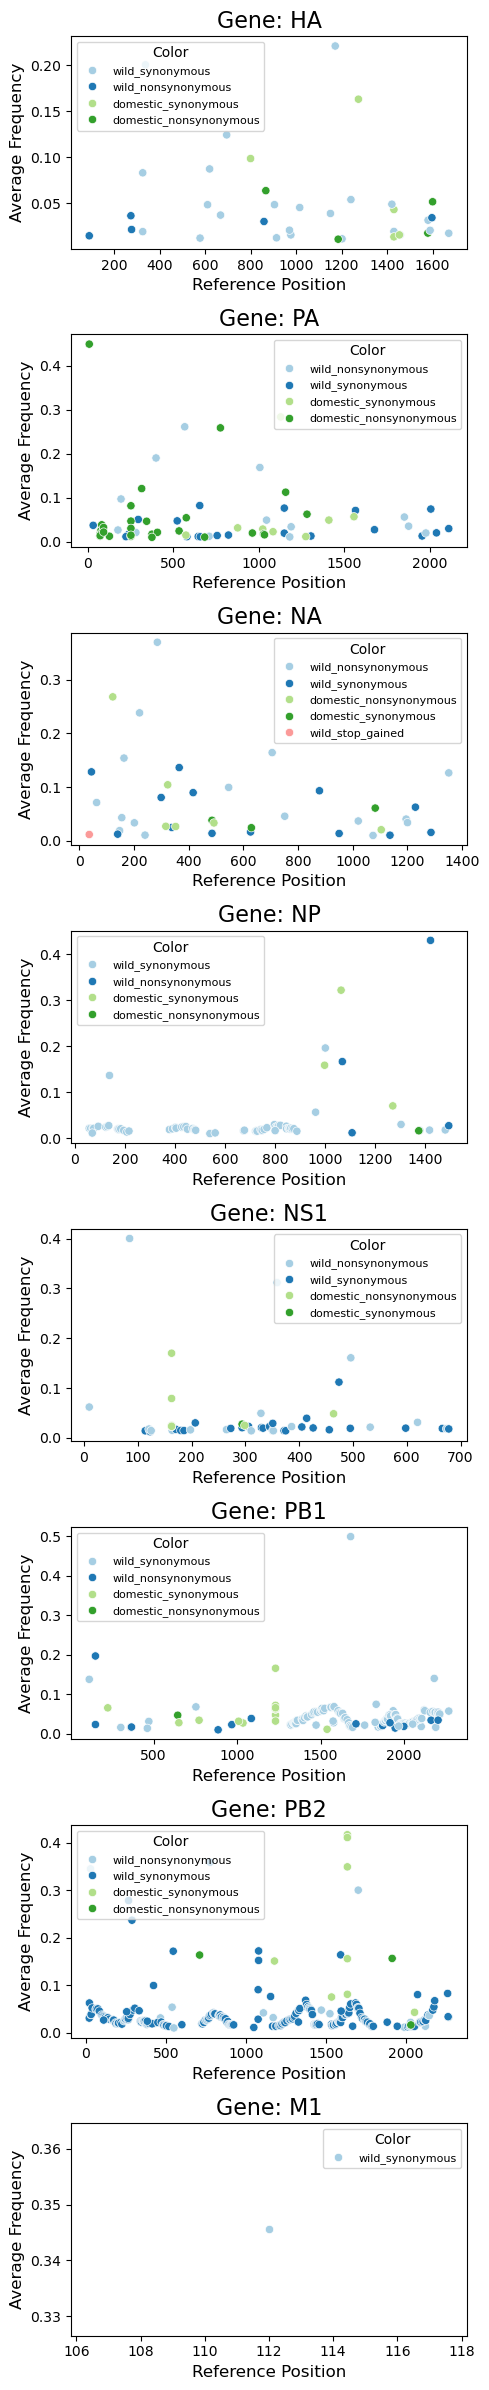

In [60]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame
# genes = shared_vars['gene'].unique()  # Get unique genes
# num_genes = len(genes)  # Number of subplots

# # Create subplots
# fig, axes = plt.subplots(num_genes, 1, figsize=(5, 3 * num_genes))

# # If there is only one subplot, axes will not be an array, so we need to handle that case
# if num_genes == 1:
#     axes = [axes]

# # Loop through each gene and plot
# for i, gene in enumerate(genes):
#     gene_data = shared_vars[shared_vars['gene'] == gene]  # Filter data for the current gene
#     ax = axes[i]  # Select the current subplot axis
    
#     # Plot the data
#     sns.scatterplot(data=gene_data, x='reference_position', y='avg_freq', hue='color',markers='dom_status', palette='Paired', ax=ax)
    
#     # Set title and labels
#     ax.set_title(f"Gene: {gene}", fontsize=16)
#     ax.set_xlabel("Reference Position", fontsize=12)
#     ax.set_ylabel("Average Frequency", fontsize=12)
#     ax.legend(title='Color', loc='best', fontsize=8)

# # Adjust layout
# plt.tight_layout()

# output_filename = "../Desktop/HPAI_PA/2025-01-24_gene_vars_plots.png"
# # plt.savefig(output_filename, format='png')

# plt.show()


In [296]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars_dedupe.groupby(['sample_ID', 'gene'])['synonymous/nonsynonymous'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
syn_nonsyn_counts = syn_nonsyn_counts.reset_index()

# Print or export the result
syn_nonsyn_counts


synonymous/nonsynonymous,sample_ID,gene,nonsynonymous,stop_gained,synonymous
0,be_w1,HA,0,0,1
1,be_w1,PA,1,0,0
2,be_w3,HA,0,0,2
3,be_w3,NA,1,0,0
4,be_w3,NP,0,0,1
...,...,...,...,...,...
137,wws_w1,NP,0,0,1
138,wws_w1,NS1,2,0,0
139,wws_w1,PA,1,0,0
140,wws_w1,PB1,1,0,0


In [297]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_vars_dedupe.groupby(['sample_ID'])['synonymous/nonsynonymous'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
total_syn_nonsyn_counts = syn_nonsyn_counts.reset_index()
total_syn_nonsyn_counts = total_syn_nonsyn_counts.rename_axis(None, axis=1).reset_index()

total_syn_nonsyn_counts = total_syn_nonsyn_counts.drop(columns=['index'])

# Print or export the result
total_syn_nonsyn_counts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample_ID      37 non-null     object
 1   nonsynonymous  37 non-null     int64 
 2   stop_gained    37 non-null     int64 
 3   synonymous     37 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [298]:
total_syn_nonsyn_counts

,sample_ID,nonsynonymous,stop_gained,synonymous
0,be_w1,1,0,1
1,be_w3,5,0,6
2,blvu_chester,10,0,17
3,bo_w1,24,0,376
4,bv_w1,1,0,2
5,bv_w2,4,0,6
6,bv_w3,7,0,10
7,bv_w4,2,0,11
8,bv_w6,7,0,11
9,bv_w7,3,0,4


In [64]:
ct_df= pd.read_csv('../Desktop/HPAI_PA/PA_samples_seqd.tsv', sep='\t')
# Remove '_R1' from the 'sample' column
ct_df['sample_ID'] = ct_df['sample_ID'].str.replace('_R1', '', regex=False).str.lower()

ct_df

,sample_species,domestic_status,county,date_collected,ct_value,sample_ID
0,Khaki Campbell,commercial,Chester,2/23/23,17.720,kc_com1
1,chicken broiler,commercial,Chester,2/23/23,18.760,cb_com1
2,Khaki Campbell,commercial,Chester,2/23/23,20.060,kc_com2
3,chicken broiler,commercial,Chester,2/23/23,20.280,cb_com2
4,Gray Fox,wild,unknown,4/2/23,12.910,gf_w
5,Black Vulture,wild,Lancaster,4/6/23,16.830,bv_w1
6,Black Vulture,wild,Lehigh,11/29/22,18.160,bv_w2
7,Turkey Vulture,wild,Lancaster,3/17/23,19.950,tv_w1
8,mute swan,wild,Monroe,10/2/22,25.040,ms_w1
9,bald eagle,wild,Crawford,9/28/22,26.950,be_w


In [ ]:
# merged_df = pd.merge(total_syn_nonsyn_counts, ct_df, on='sample_ID')
# merged_df

In [66]:
# merged_df.to_csv('../Desktop/HPAI_PA/2025_03_04_total_syn_nonsyn_counts.tsv',sep='\t', index=False)

In [67]:
# merged_df.columns

Index(['sample_ID', 'nonsynonymous', 'stop_gained', 'synonymous',
       'sample_species', 'domestic_status', 'county', 'date_collected',
       'ct_value'],
      dtype='object')

In [ ]:
# fig = px.scatter(merged_df, x='ct_value', y="synonymous", color = 'sample_ID', symbol = 'domestic_status', width=950, height=600)
#                  #, symbol = 'domestic_status', color='Species')
# fig.show()

In [83]:
syn_nonsyn_counts.tail(35)

synonymous/nonsynonymous,sample_ID,gene,nonsynonymous,stop_gained,synonymous
165,MS_W2,NA,0,0,0
166,MS_W2,M1,0,0,0
167,MS_W2,NS1,0,0,2
168,RTH_W1,PB2,0,0,2
169,RTH_W1,PB1,1,0,1
170,RTH_W1,PA,0,0,0
171,RTH_W1,HA,0,0,0
172,RTH_W1,NP,0,0,0
173,RTH_W1,NA,0,0,1
174,RTH_W1,M1,0,0,0


In [300]:
##pulling out variants that appear in more than one sample

# Assuming your dataframe is named 'df'
duplicated_gene_pos = shared_vars_dedupe[shared_vars_dedupe['gene_pos'].duplicated()]

# To get just the duplicated values in the 'gene_pos' column
duplicated_values = shared_vars_dedupe[shared_vars_dedupe['gene_pos'].duplicated()]['gene_pos'].unique()

# Print the duplicated values
print(duplicated_values)

['PB1_1578' 'PB1_1947' 'PB1_2103' 'PB2_384' 'NS1_351' 'PB2_111' 'PB2_255'
 'PB1_2052' 'PB1_2181' 'PB2_1593' 'HA_326' 'PA_1149' 'HA_1430' 'NS1_163'
 'PB2_1635' 'PB2_2055' 'PB1_1230' 'PB1_1473' 'HA_905' 'PB2_1077' 'NA_485'
 'PA_251' 'PB1_644' 'PA_71' 'PA_374' 'NS1_294' 'PA_91' 'PB2_1536'
 'PB2_1080' 'PB1_2204' 'PB2_1329' 'PB1_151']


In [302]:
duplicated_values.tolist()

['PB1_1578',
 'PB1_1947',
 'PB1_2103',
 'PB2_384',
 'NS1_351',
 'PB2_111',
 'PB2_255',
 'PB1_2052',
 'PB1_2181',
 'PB2_1593',
 'HA_326',
 'PA_1149',
 'HA_1430',
 'NS1_163',
 'PB2_1635',
 'PB2_2055',
 'PB1_1230',
 'PB1_1473',
 'HA_905',
 'PB2_1077',
 'NA_485',
 'PA_251',
 'PB1_644',
 'PA_71',
 'PA_374',
 'NS1_294',
 'PA_91',
 'PB2_1536',
 'PB2_1080',
 'PB1_2204',
 'PB2_1329',
 'PB1_151']

In [303]:
# Assuming your dataframe is named 'df' and the list of values is 'specific_values'
specific_values = ['PB1_1578',
 'PB1_1947',
 'PB1_2103',
 'PB2_384',
 'NS1_351',
 'PB2_111',
 'PB2_255',
 'PB1_2052',
 'PB1_2181',
 'PB2_1593',
 'HA_326',
 'PA_1149',
 'HA_1430',
 'NS1_163',
 'PB2_1635',
 'PB2_2055',
 'PB1_1230',
 'PB1_1473',
 'HA_905',
 'PB2_1077',
 'NA_485',
 'PA_251',
 'PB1_644',
 'PA_71',
 'PA_374',
 'NS1_294',
 'PA_91',
 'PB2_1536',
 'PB2_1080',
 'PB1_2204',
 'PB2_1329',
 'PB1_151']  # replace with your specific values

# Filter the rows where 'gene_pos' is in the specific list of values
filtered_rows = shared_vars_dedupe[shared_vars_dedupe['gene_pos'].isin(specific_values)]

# Print the filtered rows
print(filtered_rows)


     gene  reference_position reference_allele variant_allele  \
42    PB1                2103                T              C   
3360   NA                 485                T              C   
3367  PB1                 151                G              A   
3374  PB1                1578                A              G   
3376  PB1                1947                T              A   
...   ...                 ...              ...            ...   
267   PB2                1080                T              A   
1385  PB2                1080                T              G   
1249  PB1                2204                T              C   
1251  PB2                1329                T              C   
1960  PB1                 151                G              A   

     coding_region_change synonymous/nonsynonymous frequency(%)  frequency  \
42              Pro701Pro               synonymous        1.76%     0.0176   
3360            Ser160Ser               synonymous        1.37%

In [306]:
print(filtered_rows['gene_pos'].nunique)

<bound method IndexOpsMixin.nunique of 42      PB1_2103
3360      NA_485
3367     PB1_151
3374    PB1_1578
3376    PB1_1947
          ...   
267     PB2_1080
1385    PB2_1080
1249    PB1_2204
1251    PB2_1329
1960     PB1_151
Name: gene_pos, Length: 81, dtype: object>


In [323]:
filtered_rows = filtered_rows.sort_values(by=["gene", "reference_position"], ascending=[False, True])
filtered_rows

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,sample_var,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq,freq_bin
2364,PB2,111,A,G,Ser36Ser,synonymous,4.74%,0.0474,replicate-2,bo_w1,...,bo_w1_PB2_111,shared,wild,23.000,strigiformes,Erie,2024-02-14,wild_synonymous,0.03495,3-10%
1182,PB2,111,A,G,Ser36Ser,synonymous,2.53%,0.0253,replicate-2,bv_w3,...,bv_w3_PB2_111,shared,wild,16.370,acciptriformes,Adams,2022-10-10,wild_synonymous,0.02705,<3%
2384,PB2,255,T,C,Ala84Ala,synonymous,4.37%,0.0437,replicate-2,bo_w1,...,bo_w1_PB2_255,shared,wild,23.000,strigiformes,Erie,2024-02-14,wild_synonymous,0.03190,3-10%
1183,PB2,255,T,C,Ala84Ala,synonymous,4.46%,0.0446,replicate-2,bv_w3,...,bv_w3_PB2_255,shared,wild,16.370,acciptriformes,Adams,2022-10-10,wild_synonymous,0.04460,3-10%
3229,PB2,384,T,C,His127His,synonymous,2.52%,0.0252,replicate-2,bv_w1,...,bv_w1_PB2_384,shared,wild,16.830,acciptriformes,Lancaster,2023-04-06,wild_synonymous,0.02460,<3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,HA,905,C,A,Pro297Pro,synonymous,7.58%,0.0758,replicate-2,gf_w1,...,gf_w1_HA_905,shared,wild,12.910,carnivora,Unknown,2023-04-02,wild_synonymous,0.07975,3-10%
3260,HA,905,C,A,Pro297Pro,synonymous,4.45%,0.0445,replicate-2,f_w1,...,f_w1_HA_905,shared,wild,27.053,acciptriformes,Huntingdon,2023-03-22,wild_synonymous,0.04855,3-10%
3101,HA,1430,G,A,Arg472Arg,synonymous,1.79%,0.0179,replicate-2,bv_w8,...,bv_w8_HA_1430,shared,wild,22.130,acciptriformes,Chester,2022-10-19,wild_synonymous,0.01950,<3%
3039,HA,1430,G,A,Arg472Arg,synonymous,3.71%,0.0371,replicate-2,cb_com3,...,cb_com3_HA_1430,shared,commercial,22.290,galliformes,Chester,2023-02-23,commercial_synonymous,0.04325,3-10%


In [314]:
filtered_rows['gene'].value_counts()

gene
PB1    26
PB2    24
PA     13
NS1     9
HA      7
NA      2
Name: count, dtype: int64

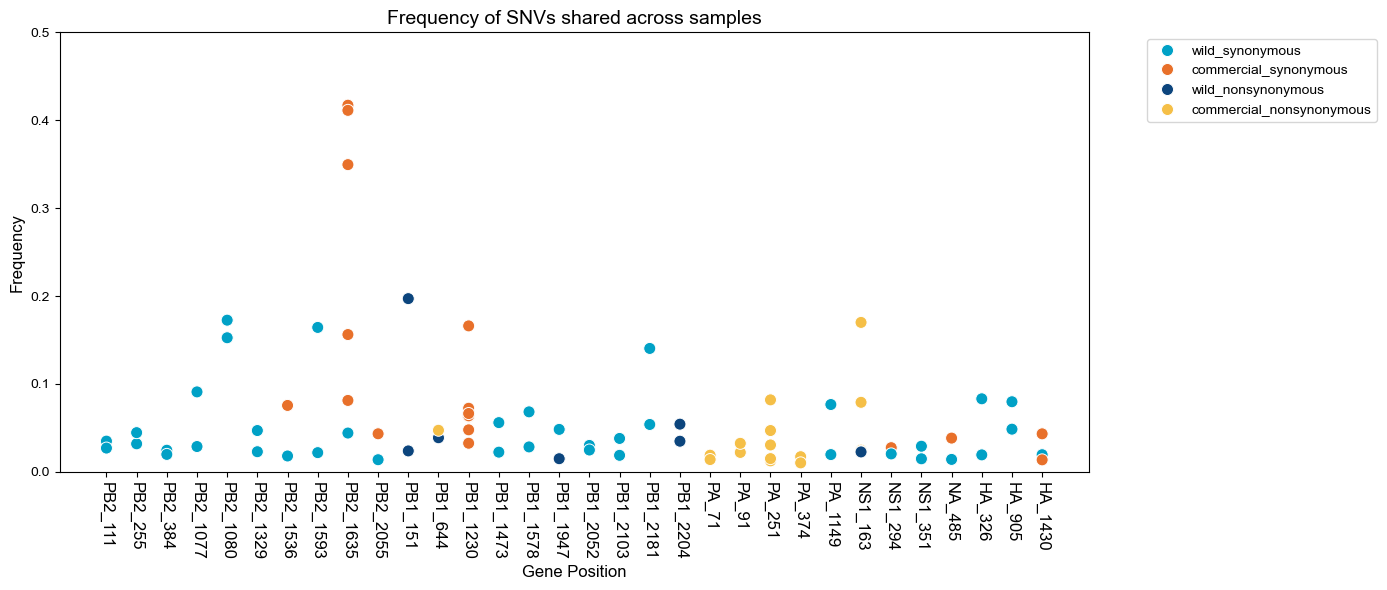

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Filter the dataframe
# pb1_shared = filtered_rows[filtered_rows["gene"] == "PB1"]

# Create the plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=filtered_rows, x="gene_pos", y="avg_freq", hue="color", palette=["#00A1C6", "#e8702a","#0c457d","#F5BF47"],
               s=75)

# Formatting
plt.xlabel("Gene Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of SNVs shared across samples", fontsize=14)
plt.xticks(rotation=270, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,0.5)
# plt.yscale('log')

# Show the plot
plt.tight_layout()

plt.savefig('SNVs_shared_across_samples.pdf', dpi=300)
plt.show()


In [309]:
filtered_rows.to_csv('2025_03_07_shared_vars_between_samples.tsv', sep='\t', index=False)

In [415]:
db = pd.read_csv('curated_database.csv')
db

,Gene,Amino_Acid,Type
0,HA,91,human-adaptation
1,HA,137,human-adaptation
2,HA,154,pathogenicity
3,HA,158,host-adaptation
4,HA,160,human-adaptation
5,HA,172,human-adaptation
6,HA,182,human-adaptation
7,HA,192,human-adaptation
8,HA,209,human-adaptation
9,HA,228,human-adaptation


In [416]:
db['Gene'] = db['Gene'].fillna("NA")
db = db.rename(columns={'Gene': 'gene'})
db

,gene,Amino_Acid,Type
0,HA,91,human-adaptation
1,HA,137,human-adaptation
2,HA,154,pathogenicity
3,HA,158,host-adaptation
4,HA,160,human-adaptation
5,HA,172,human-adaptation
6,HA,182,human-adaptation
7,HA,192,human-adaptation
8,HA,209,human-adaptation
9,HA,228,human-adaptation


In [405]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gene        49 non-null     object
 1   Amino_Acid  58 non-null     int64 
 2   Type        58 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [417]:
shared_vars_dedupe['Amino_Acid'] = shared_vars_dedupe['coding_region_change'].str.extract('(\d+)')
shared_vars_dedupe['Amino_Acid'] = pd.to_numeric(shared_vars_dedupe['Amino_Acid'], errors='coerce').astype('int64')


/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2992955365.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jt/pw4h3n2n3rz8mxjkqn3d57x00000gr/T/ipykernel_80304/2992955365.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [418]:
df_merged = shared_vars_dedupe.merge(db, on=['Amino_Acid', 'gene'], how='left')
df_merged

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat,Amino_Acid,Type
0,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,...,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.01260,<3%,acciptriformes_wild,300,NaN
1,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,...,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.19050,10-20%,acciptriformes_wild,133,NaN
2,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,...,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03900,3-10%,acciptriformes_wild,379,NaN
3,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,...,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.03170,3-10%,acciptriformes_wild,522,NaN
4,NA,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,...,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.36930,30-40%,acciptriformes_wild,94,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,NS1,125,A,G,Gln40Arg,nonsynonymous,1.1%,0.0110,replicate-2,wws_w1,...,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01450,<3%,anseriformes_wild,40,NaN
677,NS1,311,G,T,Trp102Leu,nonsynonymous,1.16%,0.0116,replicate-2,wws_w1,...,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.01415,<3%,anseriformes_wild,102,NaN
678,PA,193,T,C,Ser65Pro,nonsynonymous,10.3%,0.1030,replicate-2,wws_w1,...,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.09730,3-10%,anseriformes_wild,65,NaN
679,PB1,151,G,A,Glu51Lys,nonsynonymous,9.06%,0.0906,replicate-2,wws_w1,...,28.83,anseriformes,Erie,2022-12-19,wild_nonsynonymous,0.19705,10-20%,anseriformes_wild,51,NaN


In [419]:
functional_snvs = df_merged[df_merged['Type'].notna()]
functional_snvs

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat,Amino_Acid,Type
180,PB1,1866,C,A,Gly622Gly,synonymous,3.45%,0.0345,replicate-2,bo_w1,...,23.00,strigiformes,Erie,2024-02-14,wild_synonymous,0.02410,<3%,strigiformes_wild,622,virulence
412,PB2,1776,G,A,Gln591Gln,synonymous,2.07%,0.0207,replicate-2,bo_w1,...,23.00,strigiformes,Erie,2024-02-14,wild_synonymous,0.01930,<3%,strigiformes_wild,591,human-adaptation
415,PB2,1797,C,A,Thr598Thr,synonymous,1.32%,0.0132,replicate-2,bo_w1,...,23.00,strigiformes,Erie,2024-02-14,wild_synonymous,0.01395,<3%,strigiformes_wild,598,mammal-adaptation
463,PA,1149,T,C,Asp383Asp,synonymous,1.82%,0.0182,replicate-2,bv_w3,...,16.37,acciptriformes,Adams,2022-10-10,wild_synonymous,0.01965,<3%,acciptriformes_wild,383,mammal-adaptation
493,PA,1149,C,T,Asp383Asp,synonymous,7.67%,0.0767,replicate-2,bv_w6,...,20.01,acciptriformes,Adams,2022-10-10,wild_synonymous,0.07660,3-10%,acciptriformes_wild,383,mammal-adaptation
680,PB2,1884,A,G,Glu627Glu,synonymous,3.15%,0.0315,replicate-2,wws_w1,...,28.83,anseriformes,Erie,2022-12-19,wild_synonymous,0.02260,<3%,anseriformes_wild,627,increase-virulence


In [421]:
functional_snvs.to_csv('output_dfs/03_25_2025_functionalSNVs_allrepshared.tsv', sep='\t', index=False)

In [409]:
shared_vars_dedupe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, 1278 to 1972
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gene                      681 non-null    object  
 1   reference_position        681 non-null    int64   
 2   reference_allele          681 non-null    object  
 3   variant_allele            681 non-null    object  
 4   coding_region_change      681 non-null    object  
 5   synonymous/nonsynonymous  681 non-null    object  
 6   frequency(%)              681 non-null    object  
 7   frequency                 681 non-null    float64 
 8   replicate                 681 non-null    object  
 9   sample_ID                 681 non-null    object  
 10  gene_pos                  681 non-null    object  
 11  sample_var                681 non-null    object  
 12  rep_shared                681 non-null    object  
 13  domestic_status           681 non-null    object  


In [313]:
shared_vars.to_csv('2025_01_23_lowfreq_vars_repshared_all_data_bothreps.tsv', sep='\t', index=False)